In [ ]:
!pip install pandas
!pip install matplotlib
!pip install numpy
!pip install seaborn
!pip install datetime
!pip install holidays
!pip install sklearn.model_selection
!pip install geohash2
!pip install sklearn.ensemble 
!pip install sklearn.metrics 
!pip install sklearn.preprocessing 
!pip install xgboost
!pip install sklearn.neighbors
!pip install category_encoders
!pip install shap
!pip install sklearn.dummy
!pip install sklearn.utils.class_weight
!pip install imbalanced-learn
!pip install collections







[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement sklearn.model_selection (from versions: none)
ERROR: No matching distribution found for sklearn.model_selection

[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement sklearn.ensemble (from versions: none)
ERROR: No matching distribution found for sklearn.ensemble

[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement sklearn.metrics (from versions: none)
ERROR: No matching distribution found for sklearn.metrics

[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement sklearn.neighbors (from versions: none)
ERROR: No matching distribution found for sklearn.neighbors

[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement sklearn.dummy (from versions: none)
ERROR: No matching distribution found for sklearn.dummy

[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement sklearn.utils.class_weight (from versions: none)
ERROR: No matching distribution found for sklearn.utils.class_weight

[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement collections (from versions: none)
ERROR: No matching distribution found for collections

[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import holidays
import geohash2
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, ConfusionMatrixDisplay, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
import category_encoders as ce
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import shap
from sklearn.dummy import DummyClassifier
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE
from collections import Counter






In [ ]:
#Loading the csv file
file_name = 'Crime_Data_from_2020_to_Present.csv'

#Read the CSV file 
df = pd.read_csv(file_name)


print(df.head())

       DR_NO               Date Rptd                DATE OCC  TIME OCC  AREA  \
0  190326475  03/01/2020 12:00:00 AM  03/01/2020 12:00:00 AM      2130     7   
1  200106753  02/09/2020 12:00:00 AM  02/08/2020 12:00:00 AM      1800     1   
2  200320258  11/11/2020 12:00:00 AM  11/04/2020 12:00:00 AM      1700     3   
3  200907217  05/10/2023 12:00:00 AM  03/10/2020 12:00:00 AM      2037     9   
4  220614831  08/18/2022 12:00:00 AM  08/17/2020 12:00:00 AM      1200     6   

   AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
0   Wilshire          784         1     510   
1    Central          182         1     330   
2  Southwest          356         1     480   
3   Van Nuys          964         1     343   
4  Hollywood          666         2     354   

                                Crm Cd Desc  ... Status   Status Desc  \
0                          VEHICLE - STOLEN  ...     AA  Adult Arrest   
1                     BURGLARY FROM VEHICLE  ...     IC   Invest Cont   
2                

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966951 entries, 0 to 966950
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           966951 non-null  int64  
 1   Date Rptd       966951 non-null  object 
 2   DATE OCC        966951 non-null  object 
 3   TIME OCC        966951 non-null  int64  
 4   AREA            966951 non-null  int64  
 5   AREA NAME       966951 non-null  object 
 6   Rpt Dist No     966951 non-null  int64  
 7   Part 1-2        966951 non-null  int64  
 8   Crm Cd          966951 non-null  int64  
 9   Crm Cd Desc     966951 non-null  object 
 10  Mocodes         826575 non-null  object 
 11  Vict Age        966951 non-null  int64  
 12  Vict Sex        833245 non-null  object 
 13  Vict Descent    833235 non-null  object 
 14  Premis Cd       966937 non-null  float64
 15  Premis Desc     966375 non-null  object 
 16  Weapon Used Cd  325476 non-null  float64
 17  Weapon Des

In [6]:
#Changing the objects into string datatypes

df = df.astype({col: 'string' for col in df.select_dtypes(include='object').columns})
print(df.dtypes)


DR_NO                      int64
Date Rptd         string[python]
DATE OCC          string[python]
TIME OCC                   int64
AREA                       int64
AREA NAME         string[python]
Rpt Dist No                int64
Part 1-2                   int64
Crm Cd                     int64
Crm Cd Desc       string[python]
Mocodes           string[python]
Vict Age                   int64
Vict Sex          string[python]
Vict Descent      string[python]
Premis Cd                float64
Premis Desc       string[python]
Weapon Used Cd           float64
Weapon Desc       string[python]
Status            string[python]
Status Desc       string[python]
Crm Cd 1                 float64
Crm Cd 2                 float64
Crm Cd 3                 float64
Crm Cd 4                 float64
LOCATION          string[python]
Cross Street      string[python]
LAT                      float64
LON                      float64
dtype: object


In [ ]:
#Converting the time feature into correct format
df['TIME OCC'] = df['TIME OCC'].astype(str).str.zfill(4)  
df['TIME OCC'] = df['TIME OCC'].str[:2] + ':' + df['TIME OCC'].str[2:]


In [ ]:
#Test
print(df[['Date Rptd', 'DATE OCC','TIME OCC']].head())


                Date Rptd                DATE OCC TIME OCC
0  03/01/2020 12:00:00 AM  03/01/2020 12:00:00 AM    21:30
1  02/09/2020 12:00:00 AM  02/08/2020 12:00:00 AM    18:00
2  11/11/2020 12:00:00 AM  11/04/2020 12:00:00 AM    17:00
3  05/10/2023 12:00:00 AM  03/10/2020 12:00:00 AM    20:37
4  08/18/2022 12:00:00 AM  08/17/2020 12:00:00 AM    12:00


In [9]:
df['DATE OCC'] = pd.to_datetime(df['DATE OCC']).dt.date

C:\Users\rubin\AppData\Local\Temp\ipykernel_26800\3958263671.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATE OCC'] = pd.to_datetime(df['DATE OCC']).dt.date


In [ ]:
#Test

print(df[['Date Rptd', 'DATE OCC','TIME OCC']].head())


                Date Rptd    DATE OCC TIME OCC
0  03/01/2020 12:00:00 AM  2020-03-01    21:30
1  02/09/2020 12:00:00 AM  2020-02-08    18:00
2  11/11/2020 12:00:00 AM  2020-11-04    17:00
3  05/10/2023 12:00:00 AM  2020-03-10    20:37
4  08/18/2022 12:00:00 AM  2020-08-17    12:00


In [ ]:
#Test
print(df['TIME OCC'].value_counts().head(20))

TIME OCC
12:00    34049
18:00    25566
17:00    24289
20:00    23782
19:00    22123
22:00    21889
21:00    21018
16:00    20103
15:00    19489
14:00    17264
00:01    16759
23:00    16537
10:00    16189
08:00    16032
13:00    15222
11:00    14046
09:00    13613
01:00    11085
18:30    10729
17:30    10366
Name: count, dtype: int64


In [ ]:
#Convert to string format
df['TIME OCC'] = df['TIME OCC'].astype(str)

#Filter for values not in the 24-hour range
unusual_times = df[~df['TIME OCC'].str.match(r'^[0-1][0-9]{3}$|^[2][0-3][0-5][0-9]$')]
print("Sample of unusual TIME OCC values:")
print(unusual_times['TIME OCC'].value_counts().head(20))



Sample of unusual TIME OCC values:
TIME OCC
12:00    34049
18:00    25566
17:00    24289
20:00    23782
19:00    22123
22:00    21889
21:00    21018
16:00    20103
15:00    19489
14:00    17264
00:01    16759
23:00    16537
10:00    16189
08:00    16032
13:00    15222
11:00    14046
09:00    13613
01:00    11085
18:30    10729
17:30    10366
Name: count, dtype: int64


In [ ]:
#Filter for all values with fewer than 4 characters
short_times = df[df['TIME OCC'].str.len() < 4]

#Display unique examples
print("Unique TIME OCC values with fewer than 4 digits:")
print(short_times['TIME OCC'].unique())

Unique TIME OCC values with fewer than 4 digits:
[]


In [ ]:
df['TIME OCC'] = df['TIME OCC'].astype(str).str.zfill(4)  

# Filter for values that do not end in '00' or '30'
not_ending_in_00_30 = df[~df['TIME OCC'].str.endswith(('00', '30'))]

# Print unique examples
print("Unique TIME OCC values not ending with '00' or '30':")
print(not_ending_in_00_30['TIME OCC'].unique())


Unique TIME OCC values not ending with '00' or '30':
['20:37' '11:10' '12:20' ... '05:59' '08:18' '08:41']


In [ ]:
# Ensure TIME OCC is in string format
df['TIME OCC'] = df['TIME OCC'].astype(str)

#evaluate specific values
specific_values = [str(i) for i in range(0, 60)]  

#get count of each specified value
counts = df['TIME OCC'].value_counts().reindex(specific_values).fillna(0)


print("Occurrences of values 1 through 10 in TIME OCC:")
print(counts)



Occurrences of values 1 through 10 in TIME OCC:
TIME OCC
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
28    0.0
29    0.0
30    0.0
31    0.0
32    0.0
33    0.0
34    0.0
35    0.0
36    0.0
37    0.0
38    0.0
39    0.0
40    0.0
41    0.0
42    0.0
43    0.0
44    0.0
45    0.0
46    0.0
47    0.0
48    0.0
49    0.0
50    0.0
51    0.0
52    0.0
53    0.0
54    0.0
55    0.0
56    0.0
57    0.0
58    0.0
59    0.0
Name: count, dtype: float64


In [ ]:

df['TIME OCC'] = df['TIME OCC'].astype(str)


zero_values = ['0', '00', '000', '2359']

#Get the count of each specified values
zero_counts = df['TIME OCC'].value_counts().reindex(zero_values).fillna(0)


print("Occurrences of values 0, 00, 000, and 0000 in TIME OCC:")
print(zero_counts)


Occurrences of values 0, 00, 000, and 0000 in TIME OCC:
TIME OCC
0       0.0
00      0.0
000     0.0
2359    0.0
Name: count, dtype: float64


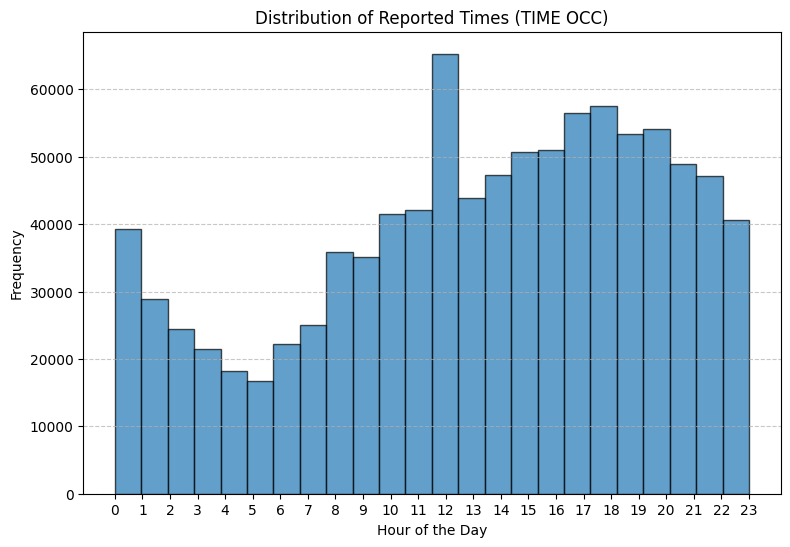

In [ ]:


# Ensure TIME OCC is in string format and then pad with zeros
df['TIME OCC'] = df['TIME OCC'].astype(str).str.zfill(4)

# Convert TIME OCC to hour format by extracting the first two characters
df['HOUR'] = df['TIME OCC'].str[:2].astype(int)  # Extract hour and convert to integer

# Plot the time spread as a histogram
plt.figure(figsize=(9, 6))
plt.hist(df['HOUR'], bins=24, range=(0, 23), edgecolor='black', alpha=0.7)
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.title('Distribution of Reported Times (TIME OCC)')
plt.xticks(range(0, 24))  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


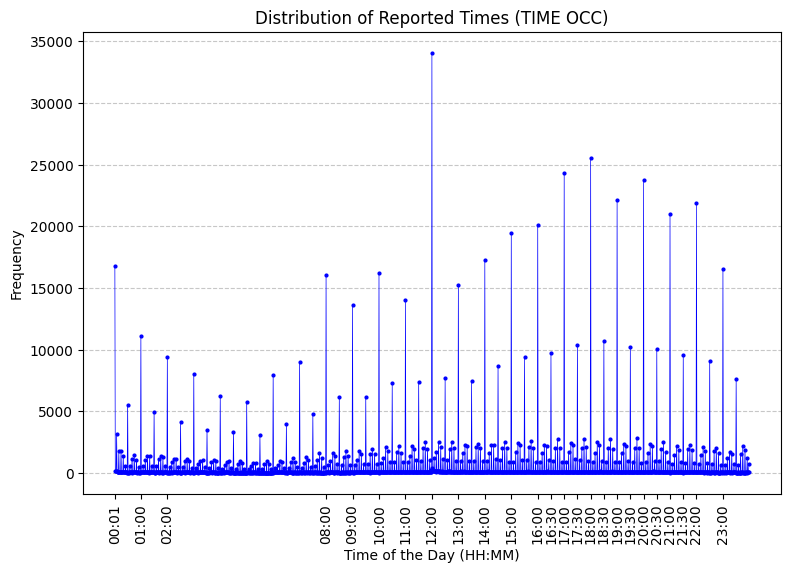

In [18]:
import matplotlib.pyplot as plt


# Count the occurrences of each unique time and sort by time
time_counts = df['TIME OCC'].value_counts().sort_index()

# Get the top 10 most frequent times
top_times = time_counts.nlargest(25).index

# Plotting code (same as before)
plt.figure(figsize=(9, 6))
plt.plot(time_counts.index, time_counts.values, marker='o', linestyle='-', markersize=2, color='blue', linewidth=0.5)
plt.xlabel('Time of the Day (HH:MM)')
plt.ylabel('Frequency')
plt.title('Distribution of Reported Times (TIME OCC)')

# Add x-tick labels for only the most frequent times
plt.xticks([time_counts.index.get_loc(time) for time in top_times], top_times, rotation=90)

plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the plot as a .png file
plt.savefig("time_occ_distribution.png", format='png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


In [19]:
print(df.dtypes)

DR_NO                      int64
Date Rptd         string[python]
DATE OCC                  object
TIME OCC                  object
AREA                       int64
AREA NAME         string[python]
Rpt Dist No                int64
Part 1-2                   int64
Crm Cd                     int64
Crm Cd Desc       string[python]
Mocodes           string[python]
Vict Age                   int64
Vict Sex          string[python]
Vict Descent      string[python]
Premis Cd                float64
Premis Desc       string[python]
Weapon Used Cd           float64
Weapon Desc       string[python]
Status            string[python]
Status Desc       string[python]
Crm Cd 1                 float64
Crm Cd 2                 float64
Crm Cd 3                 float64
Crm Cd 4                 float64
LOCATION          string[python]
Cross Street      string[python]
LAT                      float64
LON                      float64
HOUR                       int32
dtype: object


In [20]:
df = df.drop(columns=[ 'HOUR'])

In [21]:
print(df.dtypes)

DR_NO                      int64
Date Rptd         string[python]
DATE OCC                  object
TIME OCC                  object
AREA                       int64
AREA NAME         string[python]
Rpt Dist No                int64
Part 1-2                   int64
Crm Cd                     int64
Crm Cd Desc       string[python]
Mocodes           string[python]
Vict Age                   int64
Vict Sex          string[python]
Vict Descent      string[python]
Premis Cd                float64
Premis Desc       string[python]
Weapon Used Cd           float64
Weapon Desc       string[python]
Status            string[python]
Status Desc       string[python]
Crm Cd 1                 float64
Crm Cd 2                 float64
Crm Cd 3                 float64
Crm Cd 4                 float64
LOCATION          string[python]
Cross Street      string[python]
LAT                      float64
LON                      float64
dtype: object


In [22]:
# Drop the columns Status and Status Desc because these are not relevant
df = df.drop(columns=['Status', 'Status Desc'])



In [23]:
print(df.columns)

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3',
       'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT', 'LON'],
      dtype='object')


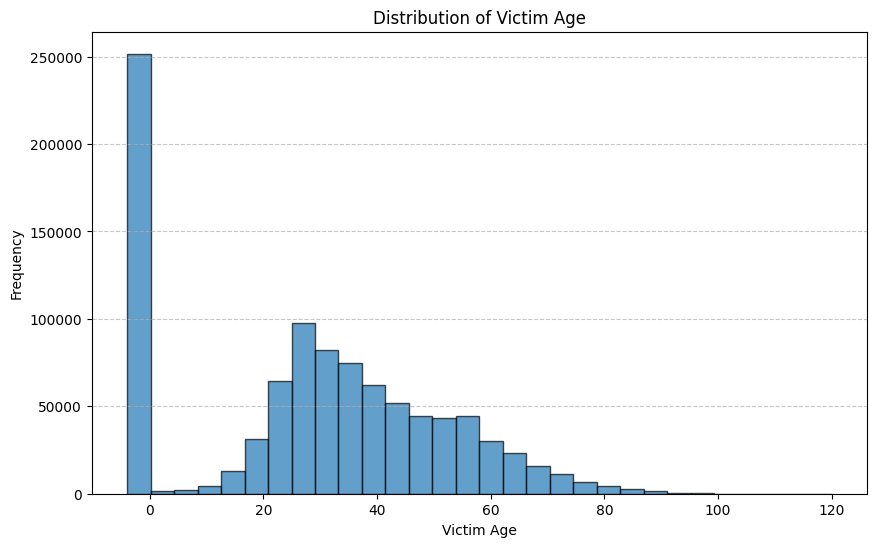

In [24]:
plt.figure(figsize=(10, 6))
plt.hist(df['Vict Age'].dropna(), bins=30, edgecolor='black', alpha=0.7)  # Drop NaNs if any
plt.xlabel('Victim Age')
plt.ylabel('Frequency')
plt.title('Distribution of Victim Age')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [26]:
# Count missing values in Vict Sex
missing_sex = df['Vict Sex'].isna().sum()
print("Missing values in Vict Sex:", missing_sex)

# Count missing values in Vict Descent
missing_descent = df['Vict Descent'].isna().sum()
print("Missing values in Vict Descent:", missing_descent)


Missing values in Vict Sex: 133706
Missing values in Vict Descent: 133716


In [27]:
# Count occurrences of age 0 and negative ages
age_0_count = (df['Vict Age'] == 0).sum()
age_minus1_count = (df['Vict Age'] == -1).sum()
age_minus2_count = (df['Vict Age'] == -2).sum()
age_minus3_count = (df['Vict Age'] == -3).sum()
print("Number of entries with Vict Age 0:", age_0_count)
print("Number of entries with Vict Age -1:", age_minus1_count)
print("Number of entries with Vict Age -2:", age_minus2_count)
print("Number of entries with Vict Age -3:", age_minus3_count)

# Display all unique values in Vict Age
unique_ages = df['Vict Age'].unique()
print("Unique values in Vict Age:", unique_ages)


Number of entries with Vict Age 0: 251488
Number of entries with Vict Age -1: 94
Number of entries with Vict Age -2: 27
Number of entries with Vict Age -3: 5
Unique values in Vict Age: [  0  47  19  28  41  25  27  24  26   8   7  13  56  22  23  31  30  57
  12  46  51  37  20  29  33  34  15  65  59   9  35  50  64  79  40  44
  32  16  21  42   6  72  10  60  36  18  63  17   5  39  62  58  45  54
  14  71  69  49  38  61  -2  43  78  67  53  11  48  73  52  68  81  80
   3  55  89  70  77  83  91  82  75  76  74  -1   2  66  84  -3   4  87
  86  85  90  99  96  88  92  94  93  95  97  98 120  -4]


In [28]:
# Remove rows where Vict Age is zero or negative
df = df[df['Vict Age'] > 0]

# Verify that negative and zero ages have been removed
print("Unique values in Vict Age after removal:", df['Vict Age'].unique())

Unique values in Vict Age after removal: [ 47  19  28  41  25  27  24  26   8   7  13  56  22  23  31  30  57  12
  46  51  37  20  29  33  34  15  65  59   9  35  50  64  79  40  44  32
  16  21  42   6  72  10  60  36  18  63  17   5  39  62  58  45  54  14
  71  69  49  38  61  43  78  67  53  11  48  73  52  68  81  80   3  55
  89  70  77  83  91  82  75  76  74   2  66  84   4  87  86  85  90  99
  96  88  92  94  93  95  97  98 120]


In [29]:
# Drop the specified columns
df = df.drop(columns=['Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4'])


# Verify that the columns have been removed
print("Remaining features in the dataset:")
print(df.columns)



Remaining features in the dataset:
Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')


In [30]:
df = df.drop(columns=['Weapon Used Cd', 'Weapon Desc'])

# Verify that the columns have been removed
print("Remaining features in the dataset:")
print(df.columns)

Remaining features in the dataset:
Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'LOCATION', 'Cross Street', 'LAT', 'LON'],
      dtype='object')


C:\Users\rubin\AppData\Local\Temp\ipykernel_26800\4252841308.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=crime_counts.index, x=crime_counts.values, palette="viridis")


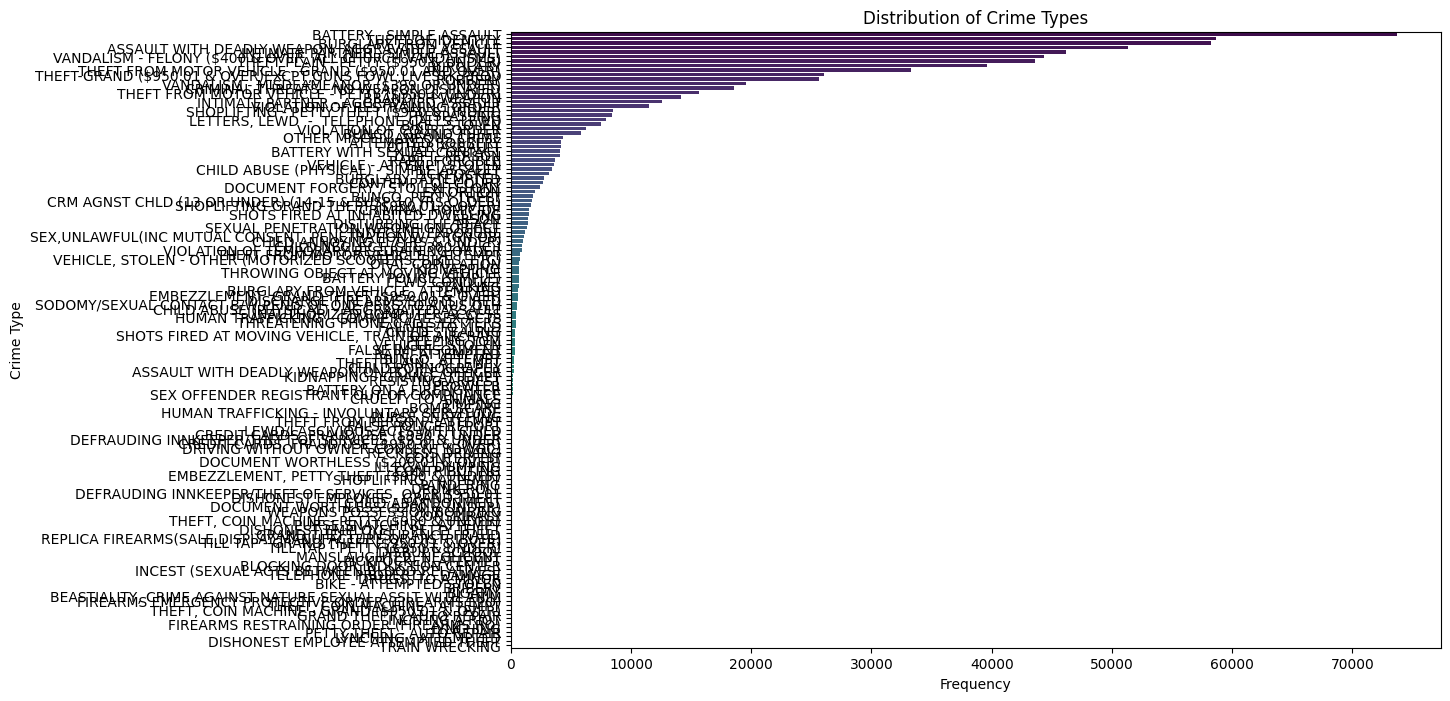

In [31]:
# Calculate the counts for each category
crime_counts = df['Crm Cd Desc'].value_counts()

# Plot a horizontal bar chart with color gradient
plt.figure(figsize=(12, 8))
sns.barplot(y=crime_counts.index, x=crime_counts.values, palette="viridis")
plt.xlabel('Frequency')
plt.ylabel('Crime Type')
plt.title('Distribution of Crime Types')
plt.show()

C:\Users\rubin\AppData\Local\Temp\ipykernel_26800\2222854599.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=crime_counts.index, x=crime_counts.values, palette="Blues_r")


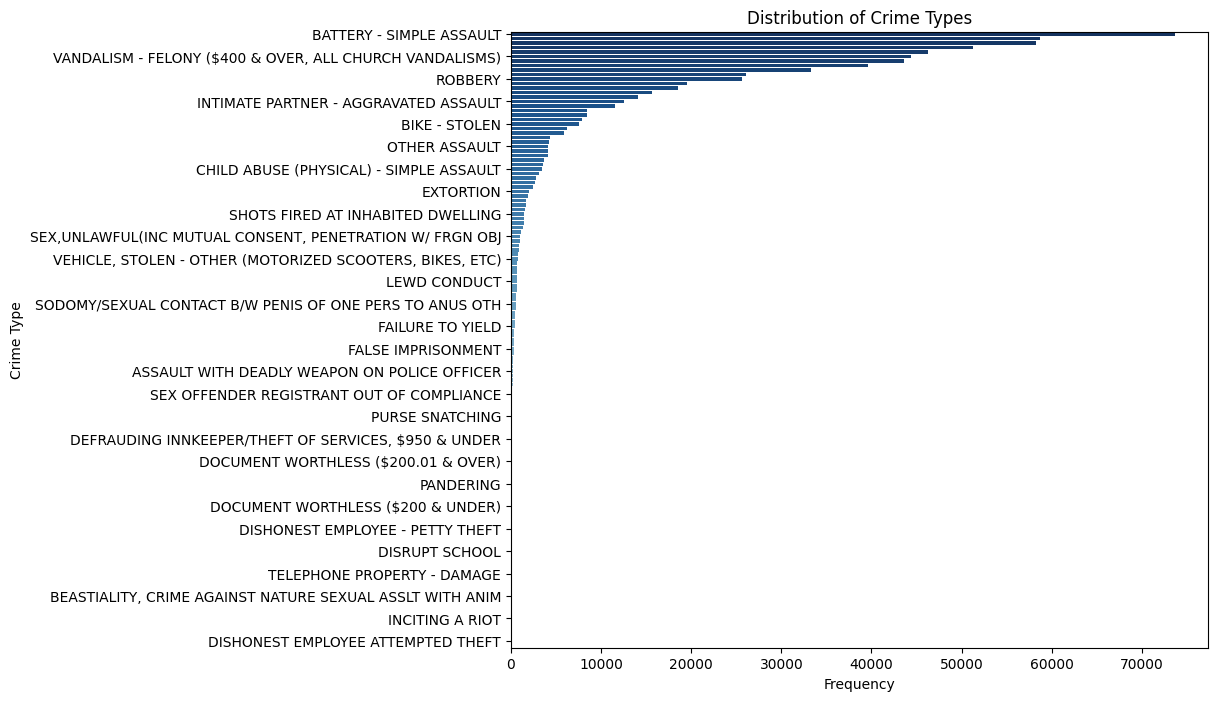

In [33]:


# Calculate the counts for each category
crime_counts = df['Crm Cd Desc'].value_counts()

# Plot all crime types
plt.figure(figsize=(9, 8))
sns.barplot(y=crime_counts.index, x=crime_counts.values, palette="Blues_r")
plt.xlabel('Frequency')
plt.ylabel('Crime Type')
plt.title('Distribution of Crime Types')

# Show only every 5th label to provide readability
plt.yticks(range(0, len(crime_counts), 5), crime_counts.index[::5])

plt.savefig('crime_type_original_distribution.png', format='png', bbox_inches='tight', dpi=300)


plt.show()



In [34]:

# Count the occurrences of each crime type and create a table
crime_counts_table = df['Crm Cd Desc'].value_counts().reset_index()
crime_counts_table.columns = ['Crime Type', 'Frequency']

# Display the table
print(crime_counts_table)


                                         Crime Type  Frequency
0                          BATTERY - SIMPLE ASSAULT      73688
1                                 THEFT OF IDENTITY      58653
2                             BURGLARY FROM VEHICLE      58278
3    ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT      51308
4                 INTIMATE PARTNER - SIMPLE ASSAULT      46217
..                                              ...        ...
132                                        LYNCHING          2
133                       PETTY THEFT - AUTO REPAIR          2
134                            LYNCHING - ATTEMPTED          1
135              DISHONEST EMPLOYEE ATTEMPTED THEFT          1
136                                  TRAIN WRECKING          1

[137 rows x 2 columns]


In [35]:
print(df["Crm Cd Desc"].nunique())

137


In [36]:


# Count the occurrences of each crime type and create a table
crime_counts_table = df['Crm Cd Desc'].value_counts().reset_index()
crime_counts_table.columns = ['Crime Type', 'Frequency']

# Set display options to show all rows and full text for each column
pd.set_option('display.max_rows', None)         # Show all rows
pd.set_option('display.max_colwidth', None)     # Show full text in each cell

# Display the full table with complete text
print(crime_counts_table)

# Optionally reset display options back to default after viewing
pd.reset_option('display.max_rows')
pd.reset_option('display.max_colwidth')


                                                   Crime Type  Frequency
0                                    BATTERY - SIMPLE ASSAULT      73688
1                                           THEFT OF IDENTITY      58653
2                                       BURGLARY FROM VEHICLE      58278
3              ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT      51308
4                           INTIMATE PARTNER - SIMPLE ASSAULT      46217
5     VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)      44365
6                          THEFT PLAIN - PETTY ($950 & UNDER)      43618
7                                                    BURGLARY      39646
8         THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)      33308
9    THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD      26066
10                                                    ROBBERY      25626
11                   VANDALISM - MISDEAMEANOR ($399 OR UNDER)      19526
12                     CRIMINAL THREATS - NO WEAPON

C:\Users\rubin\AppData\Local\Temp\ipykernel_26800\2895568433.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crime_counts_table_sorted['Frequency'], y=crime_counts_table_sorted['Crime Type'], palette="viridis")


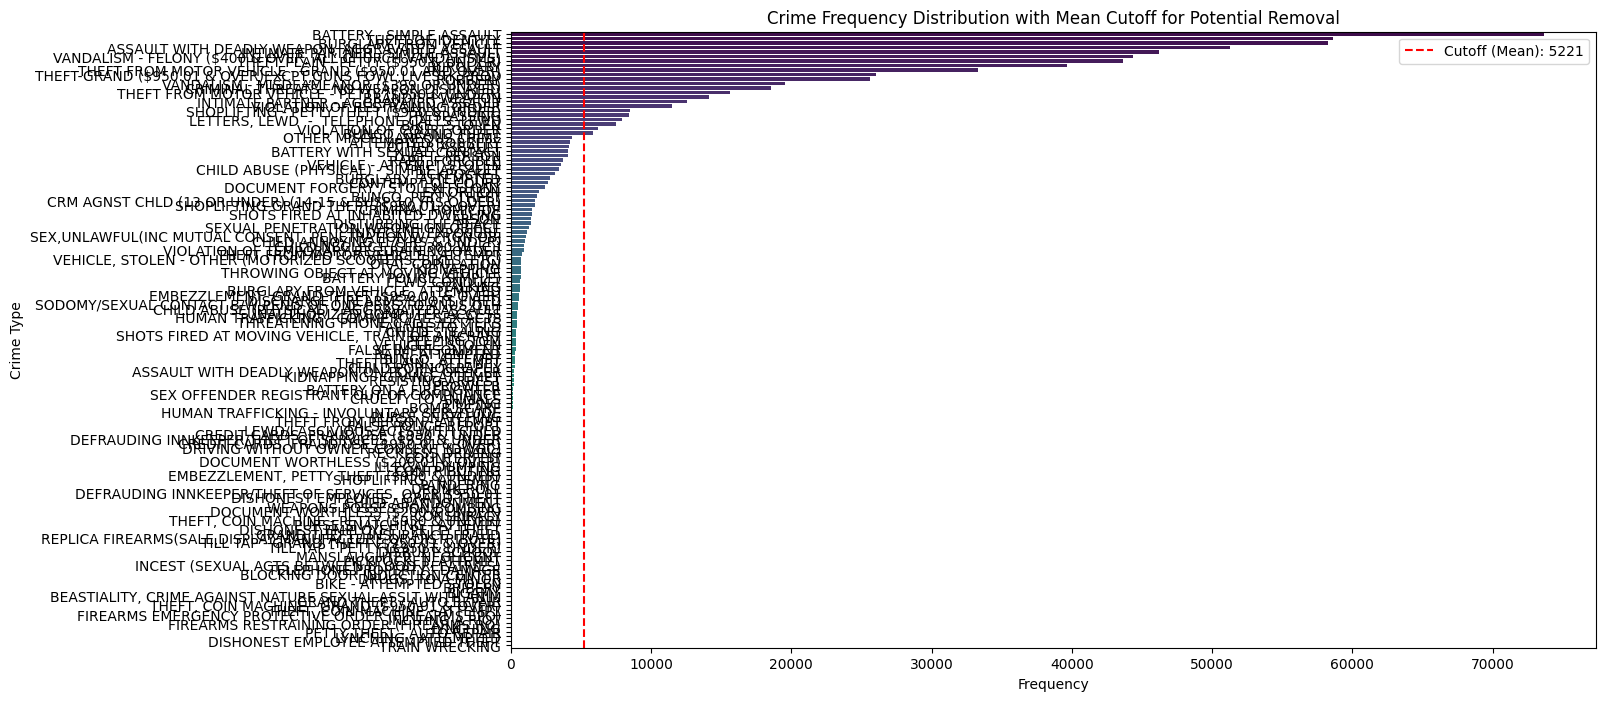

In [37]:

# Calculate mean frequency as cutoff
mean_freq = crime_counts_table['Frequency'].mean()
cutoff = mean_freq

# Sort the table for a cleaner bar plot
crime_counts_table_sorted = crime_counts_table.sort_values(by='Frequency', ascending=False)

# Plot the frequency distribution of crime types
plt.figure(figsize=(14, 8))
sns.barplot(x=crime_counts_table_sorted['Frequency'], y=crime_counts_table_sorted['Crime Type'], palette="viridis")

# Add a vertical line for the cutoff at the mean
plt.axvline(cutoff, color='red', linestyle='--', label=f'Cutoff (Mean): {cutoff:.0f}')

# Labeling the plot
plt.xlabel('Frequency')
plt.ylabel('Crime Type')
plt.title('Crime Frequency Distribution with Mean Cutoff for Potential Removal')
plt.legend()

plt.show()


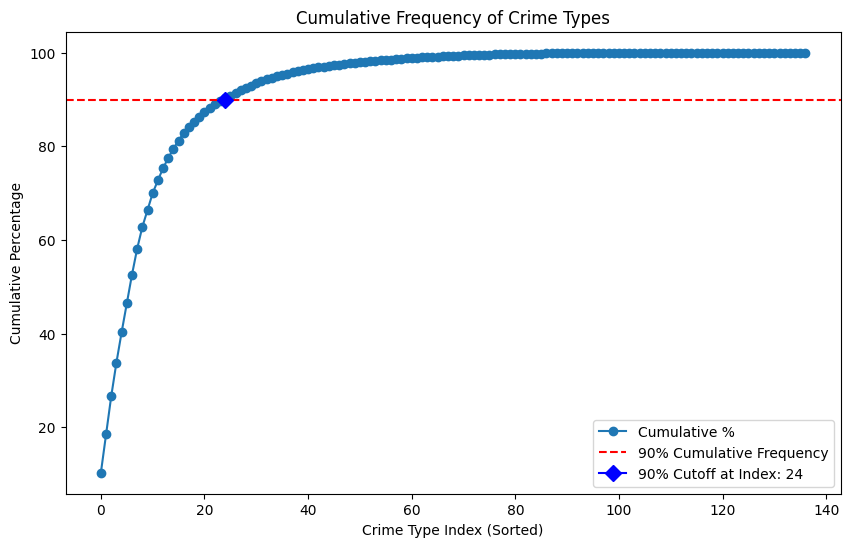

Number of crime types covering 90% of the total frequency: 24


In [38]:
# Calculate cumulative percentage
crime_counts_sorted = crime_counts_table.sort_values(by="Frequency", ascending=False)
crime_counts_sorted['Cumulative Percentage'] = crime_counts_sorted['Frequency'].cumsum() / crime_counts_sorted['Frequency'].sum() * 100

# Determine the index where the 90% cumulative frequency is reached
cutoff_index = crime_counts_sorted[crime_counts_sorted['Cumulative Percentage'] <= 90].shape[0]

# Plot cumulative frequency
plt.figure(figsize=(10, 6))
plt.plot(crime_counts_sorted['Cumulative Percentage'], marker='o', label='Cumulative %')
plt.axhline(y=90, color='r', linestyle='--', label='90% Cumulative Frequency')
plt.xlabel('Crime Type Index (Sorted)')
plt.ylabel('Cumulative Percentage')
plt.title('Cumulative Frequency of Crime Types')
plt.legend()

# Mark the cutoff point with a different marker
plt.plot(cutoff_index, 90, marker='D', color='blue', markersize=8, label=f'90% Cutoff at Index: {cutoff_index}')
plt.legend()


plt.savefig('cumulative_frequency_types.png', format='png', bbox_inches='tight', dpi=300)

plt.show()

# Display the number of crime types covering 90% of the total frequency
print(f"Number of crime types covering 90% of the total frequency: {cutoff_index}")




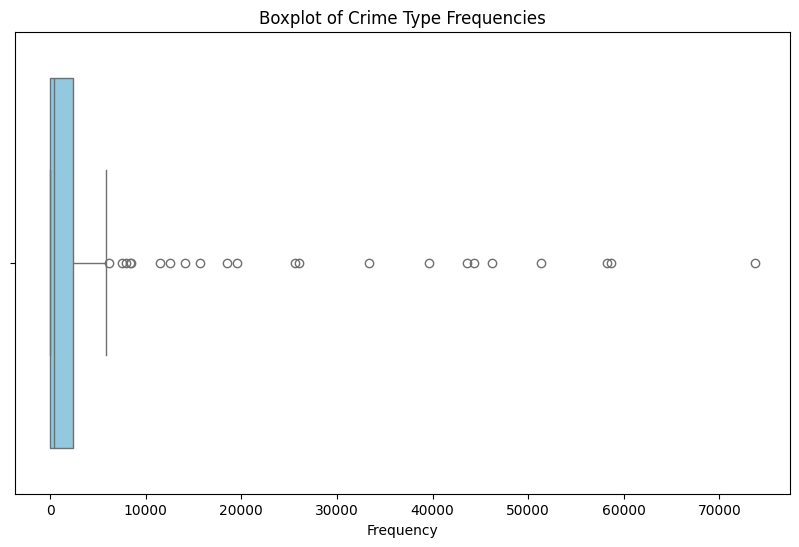

In [ ]:

# Calculate the frequency of each crime type
crime_counts = df['Crm Cd Desc'].value_counts().reset_index()
crime_counts.columns = ['Crime Type', 'Frequency']

# Plot the boxplot for the frequency of crime types
plt.figure(figsize=(10, 6))
sns.boxplot(x=crime_counts['Frequency'], color="skyblue")
plt.xlabel('Frequency')
plt.title('Boxplot of Crime Type Frequencies')
plt.show()


In [ ]:
# Define the grouping function with exclusions and combined categories
def assign_group_v5(crime_type):
    # List of high-frequency categories to exclude from grouping
    exclude_categories = [
        'BATTERY - SIMPLE ASSAULT', 'THEFT OF IDENTITY', 'BURGLARY FROM VEHICLE',
        'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT', 'ROBBERY',
        'VIOLATION OF RESTRAINING ORDER', #'BRANDISH WEAPON', 'CRIMINAL THREATS - NO WEAPON DISPLAYED'
    ]
    
    # Exclude specified categories from grouping
    if crime_type in exclude_categories:
        return crime_type  

    # Group other categories into larger groups
    crime_type = crime_type.lower() 
    if crime_type in [
        'vehicle - stolen', 'vehicle - attempt stolen', 
        'vehicle, stolen - other (motorized scooters, bikes, etc.)','bike - stolen', 'vehicle, stolen - other (motorized scooters, bikes, etc)',
        'driving without owner consent (dwoc)', 'reckless driving', 'bike - attempted stolen', 'burglary from vehicle, attempted'
    ]:
        return "Other Vehicle-Related Crimes"
    elif crime_type in [
        'extortion', 'purse snatching', 'pickpocket', 'theft, person', 'theft from person - attempt',
        'purse snatching - attempt',  'pickpocket, attempt'
    ]:
        return "Personal Theft"
    elif crime_type in [
        'shoplifting-grand theft ($950.01 & over)', 'shoplifting - petty theft ($950 & under)'
       
    ]:
        return "Shoplifting"
    elif crime_type in [
        'bunco, grand theft', 'document forgery / stolen felony',
        'credit cards, fraud use ($950.01 & over)', 'bunco, petty theft', 'bunco, attempt', 'counterfeit',
        'defrauding innkeeper/theft of services, $950 & under', 'credit cards, fraud use ($950 & under',
        'defrauding innkeeper/theft of services, over $950.01', 'false police report' 
    ]:
        return "Other Fraud"
    elif crime_type in [
        'battery police (simple)', 'other assault', 'battery with sexual contact', 'criminal threats - no weapon displayed'
    ]:
        return "Other General Assault"
    elif crime_type in [
        'disturbing the peace', 'trespassing', 'failure to yield', 'peeping tom', 'inciting a riot', 'conspiracy',
        'bomb scare', 'illegal dumping'
    ]:
        return "Public Disturbances"
    elif crime_type in [
        'rape, forcible', 'indecent exposure', 'oral copulation', 
        'lewd conduct', 'sexual penetration w/foreign object', 
        'sodomy/sexual contact b/w penis of one pers to anus oth', 'sex,unlawful(inc mutual consent, penetration w/ frgn obj', 'letters, lewd  -  telephone calls, lewd',
        'sex offender registrant out of compliance', 'pimping','rape, attempted', 'human trafficking - commercial sex acts',
        'beastiality, crime against nature sexual asslt with anim', 'incest (sexual acts between blood relatives)'
    ]:
        return "Sexual Offenses"
    elif crime_type in [
        'child abuse (physical) - simple assault', 'child abuse (physical) - aggravated assault', 
        'child stealing', 'child neglect (see 300 w.i.c.)', 'child pornography', 'lewd/lascivious acts with child', 'child annoying (17yrs & under)',
        'child abandonment', 'crm agnst chld (13 or under) (14-15 & susp 10 yrs older)',
        'kidnapping - grand attempt', 'kidnapping', 'drugs, to a minor', 'disrupt school'
    ]:
        return "Child-Related Offenses"
    #elif crime_type in [
    #    'criminal homicide', 'manslaughter, negligent', 'lynching', 'attempted lynching', 'lynching - attempted'
    #]:
    #    return "Homicide and Severe Assaults"
    elif crime_type in [
        'burglary','burglary, attempted'
    ]:
        return "Burglary or Attempted Burglary"
    
    elif crime_type in [
        'intimate partner - aggravated assault', 'intimate partner - simple assault'
    ]:
        return "Intimate Partner - Assault"
    elif crime_type in [
        'theft from motor vehicle - grand ($950.01 and over)', 'theft from motor vehicle - petty ($950 & under)',
        'theft from motor vehicle - attempt',
    ]:
        return "Theft from Vehicle"
    elif crime_type in [
        'theft plain - petty ($950 & under)',
        'theft-grand ($950.01 & over)excpt,guns,fowl,livestk,prod'
    ]:
        return "Theft - Plain/Grand"
    elif crime_type in [
        'theft plain - petty ($950 & under)',
        'theft-grand ($950.01 & over)excpt,guns,fowl,livestk,prod'
    ]:
        return "Theft - Plain/Grand"
    elif crime_type in [
        'vandalism - felony ($400 & over, all church vandalisms)',
        'vandalism - misdemeanor ($399 or under)'
    ]:
        return "Vandalism - Felony/Misdemeanor"
    else:
        return "Other Low-Frequency Crimes"  

# Apply the refined grouping function without affecting excluded categories
df['Grouped Crime Type'] = df['Crm Cd Desc'].apply(assign_group_v5)

# Calculate the frequency for each refined group
grouped_df = df['Grouped Crime Type'].value_counts().reset_index()
grouped_df.columns = ['Grouped Crime Type', 'Frequency']

# Display the new grouped frequencies table
print(grouped_df)



                                Grouped Crime Type  Frequency
0                         BATTERY - SIMPLE ASSAULT      73688
1                              Theft - Plain/Grand      69684
2                       Other Low-Frequency Crimes      62308
3                       Intimate Partner - Assault      58782
4                                THEFT OF IDENTITY      58653
5                            BURGLARY FROM VEHICLE      58278
6   ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT      51308
7                               Theft from Vehicle      49746
8                   Vandalism - Felony/Misdemeanor      44365
9                   Burglary or Attempted Burglary      42434
10                           Other General Assault      27487
11                                         ROBBERY      25626
12                                 Sexual Offenses      18086
13                    Other Vehicle-Related Crimes      12927
14                  VIOLATION OF RESTRAINING ORDER      11492
15      

In [41]:
# Create a list to capture categories that are grouped as "Other Low-Frequency Crimes"
low_frequency_crimes = []

# Apply the grouping function and capture the categories assigned to "Other Low-Frequency Crimes"
for crime in df['Crm Cd Desc'].unique():
    assigned_group = assign_group_v5(crime)
    if assigned_group == "Other low-frequency crimes":
        low_frequency_crimes.append(crime)

# Display the list of categories assigned to "Other Low-Frequency Crimes" and the count
print("Categories in 'Other low-frequency crimes':")
print(low_frequency_crimes)
print(f"Number of categories in 'Other low-frequency crimes': {len(low_frequency_crimes)}")



Categories in 'Other low-frequency crimes':
[]
Number of categories in 'Other low-frequency crimes': 0


C:\Users\rubin\AppData\Local\Temp\ipykernel_26800\564671894.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=grouped_crime_counts.index, x=grouped_crime_counts.values, palette="Blues_r")


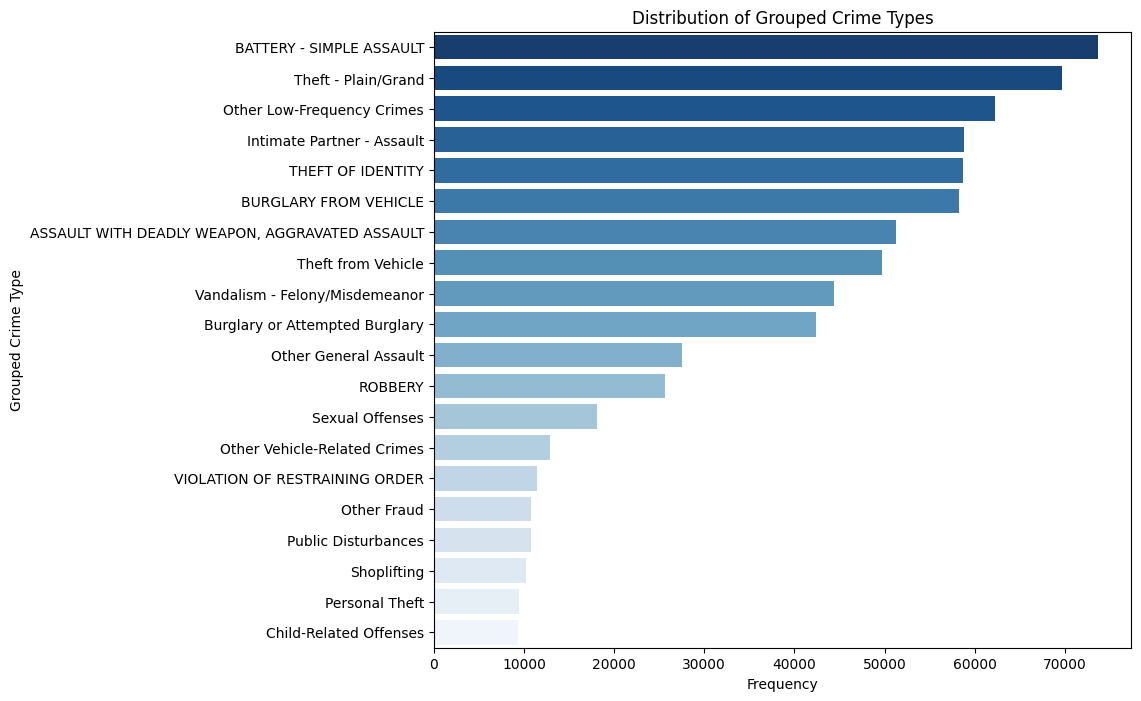

In [42]:
# Calculate the counts for each category in the 'Grouped Crime Type' column
grouped_crime_counts = df['Grouped Crime Type'].value_counts()

# Plot all grouped crime types
plt.figure(figsize=(9, 8))
sns.barplot(y=grouped_crime_counts.index, x=grouped_crime_counts.values, palette="Blues_r")
plt.xlabel('Frequency')
plt.ylabel('Grouped Crime Type')
plt.title('Distribution of Grouped Crime Types')

plt.savefig('crime_type_updated_distribution.png', format='png', bbox_inches='tight', dpi=300)

plt.show()

In [43]:
# Verify that the columns have been removed
print("Remaining features in the dataset:")
print(df.columns)

Remaining features in the dataset:
Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'LOCATION', 'Cross Street', 'LAT', 'LON', 'Grouped Crime Type'],
      dtype='object')


In [44]:
# Drop the specified columns
df = df.drop(columns=['Part 1-2', 'Mocodes'])

# Display the remaining columns
print(df.columns)


Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Crm Cd', 'Crm Cd Desc', 'Vict Age', 'Vict Sex',
       'Vict Descent', 'Premis Cd', 'Premis Desc', 'LOCATION', 'Cross Street',
       'LAT', 'LON', 'Grouped Crime Type'],
      dtype='object')


In [45]:
# Display the number of missing values for each column
missing_values = df.isnull().sum()
print(missing_values)


DR_NO                      0
Date Rptd                  0
DATE OCC                   0
TIME OCC                   0
AREA                       0
AREA NAME                  0
Rpt Dist No                0
Crm Cd                     0
Crm Cd Desc                0
Vict Age                   0
Vict Sex                  32
Vict Descent              32
Premis Cd                  1
Premis Desc              229
LOCATION                   0
Cross Street          602603
LAT                        0
LON                        0
Grouped Crime Type         0
dtype: int64


In [ ]:
# dropping missing values
df = df.dropna(subset=['Vict Sex', 'Vict Descent'])



In [47]:

remaining_instances = len(df)
print("Number of remaining instances:", remaining_instances)


Number of remaining instances: 715298


In [48]:
print(df.head())

       DR_NO               Date Rptd    DATE OCC TIME OCC  AREA  AREA NAME  \
1  200106753  02/09/2020 12:00:00 AM  2020-02-08    18:00     1    Central   
2  200320258  11/11/2020 12:00:00 AM  2020-11-04    17:00     3  Southwest   
3  200907217  05/10/2023 12:00:00 AM  2020-03-10    20:37     9   Van Nuys   
4  220614831  08/18/2022 12:00:00 AM  2020-08-17    12:00     6  Hollywood   
5  231808869  04/04/2023 12:00:00 AM  2020-12-01    23:00    18  Southeast   

   Rpt Dist No  Crm Cd                               Crm Cd Desc  Vict Age  \
1          182     330                     BURGLARY FROM VEHICLE        47   
2          356     480                             BIKE - STOLEN        19   
3          964     343  SHOPLIFTING-GRAND THEFT ($950.01 & OVER)        19   
4          666     354                         THEFT OF IDENTITY        28   
5         1826     354                         THEFT OF IDENTITY        41   

  Vict Sex Vict Descent  Premis Cd  \
1        M            O 

In [49]:
unique_area_names = df['AREA NAME'].nunique()
print("Number of unique values in 'AREA NAME':", unique_area_names)

Number of unique values in 'AREA NAME': 21


In [50]:
unique_area = df['AREA'].nunique()
print("Number of unique values in 'AREA':", unique_area_names)

Number of unique values in 'AREA': 21


In [51]:

print(df['Premis Cd'].nunique())

311


In [52]:
print(df['Vict Sex'].value_counts())

Vict Sex
M    360147
F    345488
X      9555
H       108
Name: count, dtype: Int64


In [53]:

print(df['Vict Descent'].value_counts())

Vict Descent
H    285349
W    180148
B    131660
O     63018
A     20552
X     16009
K      5457
F      4364
C      4082
J      1428
V      1073
I       942
Z       508
P       265
U       170
D        84
G        70
L        69
S        49
-         1
Name: count, dtype: Int64


In [54]:
# Define the grouping function based new group categories
def group_vict_descent(descent_code):
    if descent_code == 'H':
        return 'Hispanic/Latin/Mexican'
    elif descent_code == 'W':
        return 'White'
    elif descent_code == 'B':
        return 'Black'
    elif descent_code in ['A', 'K', 'F', 'C', 'J', 'V', 'Z', 'D', 'L']:
        return 'Asian Descent'
    elif descent_code in ['O', 'I', 'P', 'U', 'G', 'S']:
        return 'Other'
    else:
        return 'Other'


df['Grouped Descent'] = df['Vict Descent'].apply(group_vict_descent)

# New counts
grouped_counts = df.groupby('Grouped Descent').size().reset_index(name='Frequency')

print(grouped_counts)



          Grouped Descent  Frequency
0           Asian Descent      37617
1                   Black     131660
2  Hispanic/Latin/Mexican     285349
3                   Other      80524
4                   White     180148


In [55]:
print(df['Grouped Crime Type'].describe())

count                       715298
unique                          20
top       BATTERY - SIMPLE ASSAULT
freq                         73687
Name: Grouped Crime Type, dtype: object


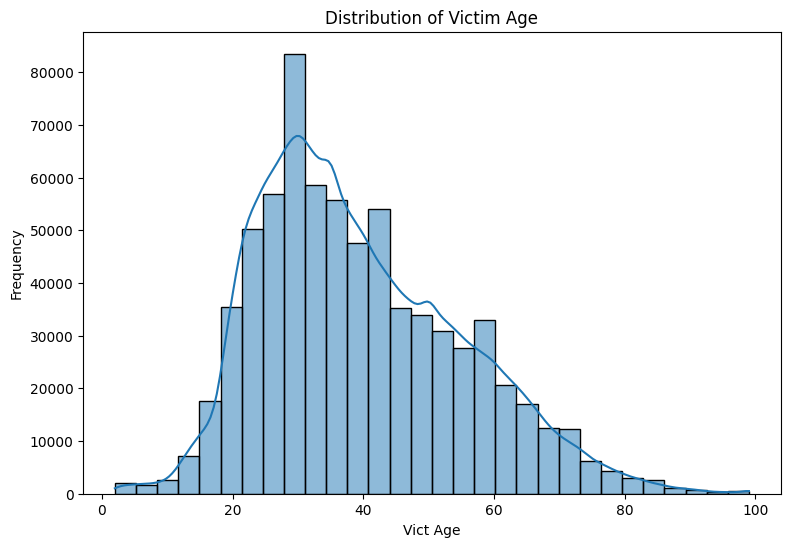

In [56]:
# Plotting the distribution of the 'Vict Age' feature
plt.figure(figsize=(9, 6))
sns.histplot(df['Vict Age'], bins=30, kde=True)
plt.xlabel('Vict Age')
plt.ylabel('Frequency')
plt.title('Distribution of Victim Age')

plt.savefig('vict_age.png', format='png', bbox_inches='tight', dpi=300)

plt.show()

In [ ]:
#creating the new features based on literature

us_holidays = holidays.US()

#Convert 'DATE OCC' to datetime
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])

#create a weekday feature
df['Weekday'] = df['DATE OCC'].dt.dayofweek + 1

#Create Season feature
def get_season(date):
    if pd.isnull(date):
        return None
    month = date.month
    day = date.day
    if (month == 12 and day >= 21) or (1 <= month <= 3 and not (month == 3 and day > 20)):
        return 'Winter'
    elif (month == 3 and day >= 21) or (4 <= month <= 6 and not (month == 6 and day > 20)):
        return 'Spring'
    elif (month == 6 and day >= 21) or (7 <= month <= 9 and not (month == 9 and day > 22)):
        return 'Summer'
    elif (month == 9 and day >= 23) or (10 <= month <= 12 and not (month == 12 and day > 20)):
        return 'Fall'
    return None

df['Season'] = df['DATE OCC'].apply(get_season)

#Create Holiday feature
df['Holiday'] = df['DATE OCC'].apply(lambda x: 1 if x in us_holidays else 0)


print(df[['DATE OCC', 'Weekday', 'Season', 'Holiday']])


         DATE OCC  Weekday  Season  Holiday
1      2020-02-08        6  Winter        0
2      2020-11-04        3    Fall        0
3      2020-03-10        2  Winter        0
4      2020-08-17        1  Summer        0
5      2020-12-01        2    Fall        0
...           ...      ...     ...      ...
966943 2024-02-11        7  Winter        0
966944 2024-01-13        6  Winter        0
966945 2024-02-17        6  Winter        0
966946 2024-01-16        2  Winter        0
966950 2024-04-24        3  Spring        0

[715298 rows x 4 columns]


In [58]:
print(df.columns)

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Crm Cd', 'Crm Cd Desc', 'Vict Age', 'Vict Sex',
       'Vict Descent', 'Premis Cd', 'Premis Desc', 'LOCATION', 'Cross Street',
       'LAT', 'LON', 'Grouped Crime Type', 'Grouped Descent', 'Weekday',
       'Season', 'Holiday'],
      dtype='object')


In [59]:
print(df['DR_NO'].nunique())

715298


In [60]:


# Function to categorize time into Morning, Afternoon, Evening, Night
def categorize_time_of_day(time_str):
    hour = int(time_str.split(':')[0])  # Extract the hour directly from the string
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Apply the function to create the new feature in the df
df['Time of Day'] = df['TIME OCC'].apply(categorize_time_of_day)

# Check
print(df[['TIME OCC', 'Time of Day']].head())





  TIME OCC Time of Day
1    18:00     Evening
2    17:00     Evening
3    20:37     Evening
4    12:00   Afternoon
5    23:00       Night


In [61]:
print(df['LOCATION'].nunique())

61621


In [ ]:
#Define a function to identify weekends
def is_weekend(day):
    if day in [6, 7]:  
        return 1
    else:
        return 0

# Apply the function to create the Weekend column
df['Weekend'] = df['Weekday'].apply(is_weekend)

#Hour feature creation
df['Hour'] = df['TIME OCC'].str[:2]  

#Check
print(df[['Weekday', 'Weekend', 'TIME OCC', 'Hour']].head())


   Weekday  Weekend TIME OCC Hour
1        6        1    18:00   18
2        3        0    17:00   17
3        2        0    20:37   20
4        1        0    12:00   12
5        2        0    23:00   23


In [63]:
print(df.columns)

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Crm Cd', 'Crm Cd Desc', 'Vict Age', 'Vict Sex',
       'Vict Descent', 'Premis Cd', 'Premis Desc', 'LOCATION', 'Cross Street',
       'LAT', 'LON', 'Grouped Crime Type', 'Grouped Descent', 'Weekday',
       'Season', 'Holiday', 'Time of Day', 'Weekend', 'Hour'],
      dtype='object')


In [64]:
# list of columns to drop
columns_to_drop = ['DATE OCC', 'TIME OCC', 'Date Rptd', 'DR_NO', 'Cross Street']


df = df.drop(columns=columns_to_drop)


print(df.columns)


Index(['AREA', 'AREA NAME', 'Rpt Dist No', 'Crm Cd', 'Crm Cd Desc', 'Vict Age',
       'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc', 'LOCATION',
       'LAT', 'LON', 'Grouped Crime Type', 'Grouped Descent', 'Weekday',
       'Season', 'Holiday', 'Time of Day', 'Weekend', 'Hour'],
      dtype='object')


In [65]:
#dropping specific columns
df = df.drop(columns=['Weekday', 'Vict Descent', 'Premis Cd', 'AREA', 'Rpt Dist No', 'Crm Cd', 'Crm Cd Desc'])


print(df.columns)

Index(['AREA NAME', 'Vict Age', 'Vict Sex', 'Premis Desc', 'LOCATION', 'LAT',
       'LON', 'Grouped Crime Type', 'Grouped Descent', 'Season', 'Holiday',
       'Time of Day', 'Weekend', 'Hour'],
      dtype='object')


In [66]:
vict_sex_frequencies = df['Vict Sex'].value_counts()
print(vict_sex_frequencies)

Vict Sex
M    360147
F    345488
X      9555
H       108
Name: count, dtype: Int64


In [ ]:

df = df[~df['Vict Sex'].isin(['X', 'H'])]


print(df['Vict Sex'].value_counts())


Vict Sex
M    360147
F    345488
Name: count, dtype: Int64


In [ ]:
#Function to convert latitude and longitude to geohash
def apply_geohash(df, lat_col='LAT', lon_col='LON', precision=6):
    
    #Converts latitude and longitude to geohash.
    
    #Parameters:
    #- df: DataFrame with latitude and longitude columns.
    #- lat_col: Name of the latitude column in the DataFrame.
    #- lon_col: Name of the longitude column in the DataFrame.
    #- precision: Length of the geohash string, default is 6 (recommended for city-level data).
    
    #Returns:
    #- DataFrame with a new 'Geohash' column.
    
    df['Geohash'] = df.apply(lambda row: geohash2.encode(row[lat_col], row[lon_col], precision=precision), axis=1)
    return df

#Applying geohash function to the whole df
df = apply_geohash(df, lat_col='LAT', lon_col='LON', precision=6)

# check 
print(df[['LAT', 'LON', 'Geohash']].head())

       LAT       LON Geohash
1  34.0444 -118.2628  9q5csv
3  34.1576 -118.4387  9q5f2f
4  34.0944 -118.3277  9q5cgq
5  33.9467 -118.2463  9q5cj5
6  34.0415 -118.2620  9q5csv


In [69]:
print(df.head(20))

      AREA NAME  Vict Age Vict Sex  \
1       Central        47        M   
3      Van Nuys        19        M   
4     Hollywood        28        M   
5     Southeast        41        M   
6       Central        25        M   
7     Southwest        27        F   
8        Newton        24        F   
9       Mission        26        M   
10    Southeast        26        M   
11      Mission         8        F   
12      Rampart         7        F   
14      Rampart        13        F   
15    Southwest        56        M   
16    Southeast        22        F   
17       Newton        23        M   
18     Wilshire        31        F   
19  West Valley        30        F   
20     Wilshire        57        F   
21      West LA        56        F   
22      Mission        12        F   

                                     Premis Desc  \
1              BUS STOP/LAYOVER (ALSO QUERY 124)   
3                                 CLOTHING STORE   
4                                       SIDEW

In [70]:
print(df['Premis Desc'].nunique())

304


In [71]:
missing_values = df.isnull().sum()
print(missing_values)

AREA NAME               0
Vict Age                0
Vict Sex                0
Premis Desc           186
LOCATION                0
LAT                     0
LON                     0
Grouped Crime Type      0
Grouped Descent         0
Season                  0
Holiday                 0
Time of Day             0
Weekend                 0
Hour                    0
Geohash                 0
dtype: int64


In [72]:
df = df.dropna(subset=['Premis Desc'])


In [73]:
# creating the age groups
def categorize_age(age):
    if age < 18:
        return 'Child'
    elif 18 <= age < 30:
        return 'Young Adult'
    elif 30 <= age < 60:
        return 'Adult'
    elif age >= 60:
        return 'Senior'
    

# create new variable based on age
df['Age Grouped'] = df['Vict Age'].apply(categorize_age)


print(df[['Vict Age', 'Age Grouped']].head())


   Vict Age  Age Grouped
1        47        Adult
3        19  Young Adult
4        28  Young Adult
5        41        Adult
6        25  Young Adult


In [74]:
print(df['Age Grouped'].value_counts())

Age Grouped
Adult          410315
Young Adult    181354
Senior          88712
Child           25068
Name: count, dtype: int64


In [76]:
df['Hour'] = pd.to_numeric(df['Hour'], errors='coerce')

In [77]:
# Calculate key numerical statistics
num_summary = {
    "Vict Age (years)": [df["Vict Age"].mean(), df["Vict Age"].min(), df["Vict Age"].max()],
    "Latitude": [df["LAT"].mean(), df["LAT"].min(), df["LAT"].max()],
    "Longitude": [df["LON"].mean(), df["LON"].min(), df["LON"].max()],
    "Hour": [df["Hour"].mean(), df["Hour"].min(), df["Hour"].max()],
}

num_table = pd.DataFrame(num_summary, index=["Mean", "Min", "Max"]).T 

# Categorical statistics summary
cat_summary = {
    "Grouped Crime Type": df["Grouped Crime Type"].value_counts().idxmax(),
    "Grouped Descent": df["Grouped Descent"].value_counts().idxmax(),
    "Age Grouped": df['Age Grouped'].value_counts().idxmax(),
    "Premis Desc": df["Premis Desc"].value_counts().idxmax(),
    "Vict Sex": df["Vict Sex"].value_counts().idxmax(),
    "AREA NAME": df["AREA NAME"].value_counts().idxmax(),
    "Time of Day": df["Time of Day"].value_counts().idxmax(),
    "Holiday": df["Holiday"].value_counts().idxmax(),
    "Weekend": df["Weekend"].value_counts().idxmax(),
    "LOCATION": df["LOCATION"].value_counts().idxmax()
}

cat_table = pd.DataFrame(
    list(cat_summary.items()), columns=["Feature", "Most Common Value"]
)


print("Numerical Summary:\n", num_table)
print("\nCategorical Summary:\n", cat_table)



Numerical Summary:
                         Mean       Min      Max
Vict Age (years)   39.752288    2.0000  99.0000
Latitude           33.994494    0.0000  34.3343
Longitude        -118.073628 -118.6676   0.0000
Hour               13.069697    0.0000  23.0000

Categorical Summary:
               Feature                       Most Common Value
0  Grouped Crime Type                BATTERY - SIMPLE ASSAULT
1     Grouped Descent                  Hispanic/Latin/Mexican
2         Age Grouped                                   Adult
3         Premis Desc                  SINGLE FAMILY DWELLING
4            Vict Sex                                       M
5           AREA NAME                                 Central
6         Time of Day                                   Night
7             Holiday                                       0
8             Weekend                                       0
9            LOCATION  800 N  ALAMEDA                      ST


In [ ]:
#Rename to prevent confusion
df.rename(columns={"Grouped Descent": "Grouped Vict Descent"}, inplace=True)


print(df.columns)

Index(['AREA NAME', 'Vict Age', 'Vict Sex', 'Premis Desc', 'LOCATION', 'LAT',
       'LON', 'Grouped Crime Type', 'Grouped Vict Descent', 'Season',
       'Holiday', 'Time of Day', 'Weekend', 'Hour', 'Geohash', 'Age Grouped'],
      dtype='object')


In [ ]:
#Shuffle the dataset
df_shuffled = df.sample(frac=1, random_state=10).reset_index(drop=True)


print(df_shuffled.head())

   AREA NAME  Vict Age Vict Sex                                   Premis Desc  \
0    Olympic        44        F  MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)   
1  Southeast        46        F                        SINGLE FAMILY DWELLING   
2     Newton        25        M                                      SIDEWALK   
3  Southwest        40        M                   YARD (RESIDENTIAL/BUSINESS)   
4    Olympic        43        F                        SINGLE FAMILY DWELLING   

                                  LOCATION      LAT       LON  \
0   300 S  GRAMERCY                     PL  34.0690 -118.3128   
1  1800 E  108TH                        ST  33.9379 -118.2407   
2  1900 S  FLOWER                       ST  34.0324 -118.2717   
3  4800    7TH                          AV  34.0000 -118.3247   
4  1800 S  HOBART                       BL  34.0424 -118.3053   

               Grouped Crime Type    Grouped Vict Descent  Season  Holiday  \
0               THEFT OF IDENTITY           

In [80]:
#target variable and features
target = "Grouped Crime Type"
X = df_shuffled.drop(columns=[target])
y = df_shuffled[target]

# Split data into training and temporary sets
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=10, stratify=y
)

# Split the temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=10, stratify=y_temp
)


print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 423269
Validation set size: 141090
Test set size: 141090


In [81]:
print(df['Geohash'].nunique())

2022


C:\Users\rubin\AppData\Local\Temp\ipykernel_26800\564671894.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=grouped_crime_counts.index, x=grouped_crime_counts.values, palette="Blues_r")


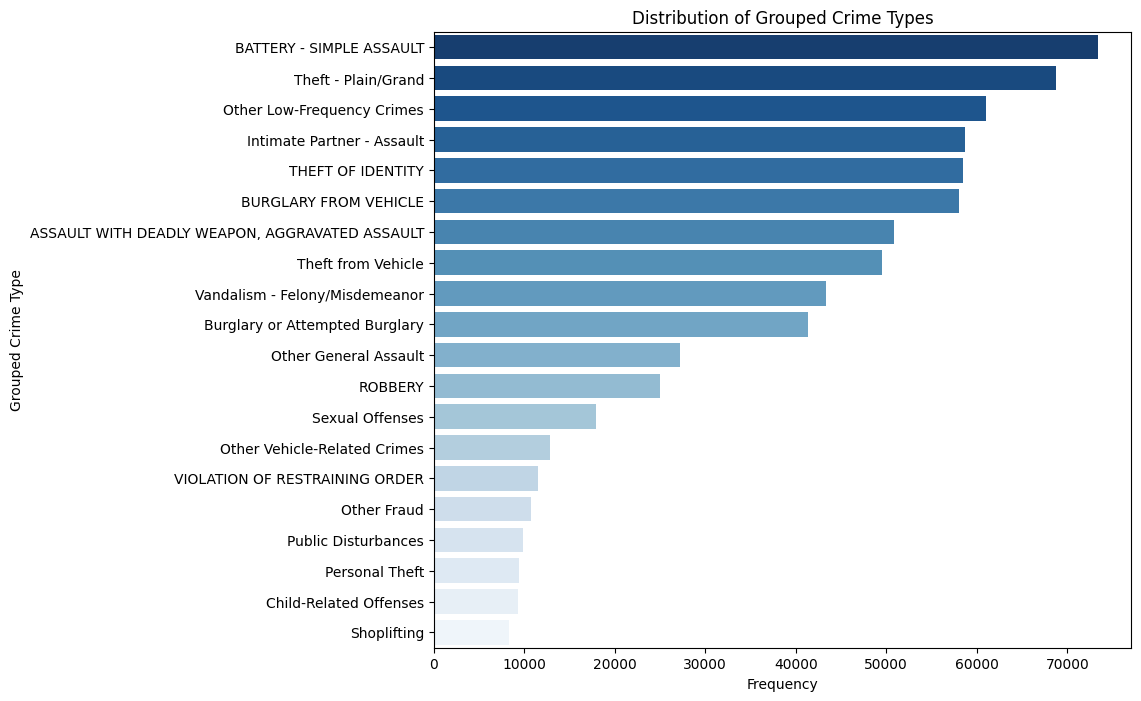

In [ ]:
#Calculate the freq for each category in the 'Grouped Crime Type' column
grouped_crime_counts = df['Grouped Crime Type'].value_counts()

#Plot all grouped crime types
plt.figure(figsize=(9, 8))
sns.barplot(y=grouped_crime_counts.index, x=grouped_crime_counts.values, palette="Blues_r")
plt.xlabel('Frequency')
plt.ylabel('Grouped Crime Type')
plt.title('Distribution of Grouped Crime Types')

plt.savefig('crime_type_updated_distribution.png', format='png', bbox_inches='tight', dpi=300)

plt.show()

In [ ]:
#calculating the imbalance ratio
def calculate_adjusted_ir(data, target_column, lambda_value=1.0):
    
    # Calculate class frequencies
    class_counts = data[target_column].value_counts()
    n_majority = class_counts.max()
    n_minority = class_counts.min()
    
    # Calculate basic IR
    ir = n_majority / n_minority
    
    # Total number of features (D)
    D = data.shape[1] - 1  # Subtract 1 to exclude the target column
    
   
    F = D
    
    # Calculate Adjusted-IR
    adjusted_ir = ir * (1 + lambda_value * (D - F) / D)
    
    # Print intermediate values
    print(f"Class Counts:\n{class_counts}")
    print(f"Majority Class Size (n_majority): {n_majority}")
    print(f"Minority Class Size (n_minority): {n_minority}")
    print(f"Basic Imbalance Ratio (IR): {ir}")
    print(f"Total Features (D): {D}")
    print(f"Discriminative Features (F): {F}")
    
    return adjusted_ir


target_column = "Grouped Crime Type" 
adjusted_ir = calculate_adjusted_ir(df, target_column=target_column, lambda_value=1.0)
print(f"Adjusted Imbalance Ratio: {adjusted_ir}")




Class Counts:
Grouped Crime Type
BATTERY - SIMPLE ASSAULT                          73399
Theft - Plain/Grand                               68788
Other Low-Frequency Crimes                        61034
Intimate Partner - Assault                        58740
THEFT OF IDENTITY                                 58477
BURGLARY FROM VEHICLE                             58033
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT    50800
Theft from Vehicle                                49475
Vandalism - Felony/Misdemeanor                    43362
Burglary or Attempted Burglary                    41324
Other General Assault                             27181
ROBBERY                                           25030
Sexual Offenses                                   17956
Other Vehicle-Related Crimes                      12812
VIOLATION OF RESTRAINING ORDER                    11463
Other Fraud                                       10719
Public Disturbances                                9895
Personal Theft 

In [84]:
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)

Training set shape: (423269, 15)
Validation set shape: (141090, 15)
Test set shape: (141090, 15)


# ENCODING

In [ ]:
#Columns to one-hot encode
columns_to_encode = ['Vict Sex', 'Season', 'Time of Day', 'Age Grouped', 'Grouped Vict Descent']

#Perform one-hot encoding on the training set
X_train_encoded = pd.get_dummies(X_train, columns=columns_to_encode, drop_first=False)

#Transform the validation and test sets using the same columns
X_val_encoded = pd.get_dummies(X_val, columns=columns_to_encode, drop_first=False)
X_test_encoded = pd.get_dummies(X_test, columns=columns_to_encode, drop_first=False)

#Align validation and test sets with the training set (fill missing columns with 0)
encoded_columns = X_train_encoded.columns
X_val_encoded = X_val_encoded.reindex(columns=encoded_columns, fill_value=0)
X_test_encoded = X_test_encoded.reindex(columns=encoded_columns, fill_value=0)

#Ensure only the one-hot encoded columns are converted to integers
one_hot_columns = [col for col in encoded_columns if any(c in col for c in columns_to_encode)]
X_train_encoded[one_hot_columns] = X_train_encoded[one_hot_columns].astype(int)
X_val_encoded[one_hot_columns] = X_val_encoded[one_hot_columns].astype(int)
X_test_encoded[one_hot_columns] = X_test_encoded[one_hot_columns].astype(int)

#display
print("Training set encoded shape:", X_train_encoded.shape)
print("Validation set encoded shape:", X_val_encoded.shape)
print("Test set encoded shape:", X_test_encoded.shape)




Training set encoded shape: (423269, 29)
Validation set encoded shape: (141090, 29)
Test set encoded shape: (141090, 29)


In [86]:
print(X_train_encoded.head())

          AREA NAME  Vict Age             Premis Desc  \
359879    Hollywood        22                  STREET   
566549   Devonshire        37  SINGLE FAMILY DWELLING   
696859   Devonshire        27  SINGLE FAMILY DWELLING   
246829   Hollenbeck        39  SINGLE FAMILY DWELLING   
63524   77th Street        32             PARKING LOT   

                                        LOCATION      LAT       LON  Holiday  \
359879   1300 N  WESTERN                      AV  34.0944 -118.3125        0   
566549   8300    BLEWETT                      AV  34.2217 -118.4798        0   
696859  17200    FLANDERS                     ST  34.2802 -118.5082        0   
246829   4700    GAMBIER                      ST  34.0809 -118.1819        0   
63524    5000 S  WESTERN                      AV  33.9980 -118.3089        0   

        Weekend  Hour Geohash  ...  Time of Day_Night  Age Grouped_Adult  \
359879        1    18  9q5cgw  ...                  0                  0   
566549        0    20  9

In [ ]:
#Features to label encode
categorical_features = ['AREA NAME','Premis Desc', 'Geohash']

#Dictionary to store label encoders for each feature
label_encoders = {}

#Encode training data and store the encoders
for feature in categorical_features:
    le = LabelEncoder()
    X_train_encoded[feature] = le.fit_transform(X_train_encoded[feature])
    label_encoders[feature] = le  # Save encoder for validation and test sets

#Create a mapping for unseen categories
for feature in categorical_features:
    # Get a dictionary mapping from category to encoded value
    category_to_code = {label: code for code, label in enumerate(label_encoders[feature].classes_)}
    # Add a default value for unseen categories
    category_to_code["<UNK>"] = -1

    # Map the validation and test sets using the dictionary
    X_val_encoded[feature] = X_val_encoded[feature].map(category_to_code).fillna(-1).astype(int)
    X_test_encoded[feature] = X_test_encoded[feature].map(category_to_code).fillna(-1).astype(int)

#Display 
print("Sample of transformed training set:")
print(X_train_encoded.head())




Sample of transformed training set:
        AREA NAME  Vict Age  Premis Desc  \
359879          6        22          262   
566549          2        37          251   
696859          2        27          251   
246829          5        39          251   
63524           0        32          224   

                                        LOCATION      LAT       LON  Holiday  \
359879   1300 N  WESTERN                      AV  34.0944 -118.3125        0   
566549   8300    BLEWETT                      AV  34.2217 -118.4798        0   
696859  17200    FLANDERS                     ST  34.2802 -118.5082        0   
246829   4700    GAMBIER                      ST  34.0809 -118.1819        0   
63524    5000 S  WESTERN                      AV  33.9980 -118.3089        0   

        Weekend  Hour  Geohash  ...  Time of Day_Night  Age Grouped_Adult  \
359879        1    18      625  ...                  0                  0   
566549        0    20     1245  ...                  0          

In [ ]:
#Frequency encoding for 'LOCATION' in the training set
location_counts = X_train_encoded['LOCATION'].value_counts()

#Apply frequency encoding to the training set
X_train_encoded['Street_frequency'] = X_train_encoded['LOCATION'].map(location_counts)

#Safe transformation function to handle missing values in validation and test sets
def frequency_encode_with_defaults(data, counts, default_value=0):
    return data.map(counts).fillna(default_value)

#Apply the transformation to validation and test sets
X_val_encoded['Street_frequency'] = frequency_encode_with_defaults(X_val_encoded['LOCATION'], location_counts)
X_test_encoded['Street_frequency'] = frequency_encode_with_defaults(X_test_encoded['LOCATION'], location_counts)

#Check the results
print("Training set frequency encoding sample:")
print(X_train_encoded[['LOCATION', 'Street_frequency']].head())

print("\nValidation set frequency encoding sample:")
print(X_val_encoded[['LOCATION', 'Street_frequency']].head())

print("\nTest set frequency encoding sample:")
print(X_test_encoded[['LOCATION', 'Street_frequency']].head())

X_train_encoded = X_train_encoded.drop(columns=['LOCATION'], errors='ignore')
X_val_encoded = X_val_encoded.drop(columns=['LOCATION'], errors='ignore')
X_test_encoded = X_test_encoded.drop(columns=['LOCATION'], errors='ignore')


Training set frequency encoding sample:
                                        LOCATION  Street_frequency
359879   1300 N  WESTERN                      AV                52
566549   8300    BLEWETT                      AV                 5
696859  17200    FLANDERS                     ST                 4
246829   4700    GAMBIER                      ST                 7
63524    5000 S  WESTERN                      AV                13

Validation set frequency encoding sample:
                                        LOCATION  Street_frequency
678712  13400    WHEELER                      AV                 4
222440   7500    GARDEN GROVE                 AV                 1
477955  10300 W  OLYMPIC                      BL                27
366565                                      HILL                54
51835    6700    MARMION                      WY                 0

Test set frequency encoding sample:
                                        LOCATION  Street_frequency
7218     

In [89]:
print(X_test_encoded.head())

        AREA NAME  Vict Age  Premis Desc      LAT       LON  Holiday  Weekend  \
7218           13        20          262  34.0812 -118.2981        0        1   
438707         11        36           95  34.0672 -118.2992        1        0   
215485          0        42          250  33.9746 -118.2917        0        1   
192951         15        29            5  34.0099 -118.3446        1        0   
336837          7        37          224  34.2697 -118.4671        0        1   

        Hour  Geohash  Vict Sex_F  ...  Age Grouped_Adult  Age Grouped_Child  \
7218      10      807           1  ...                  0                  0   
438707     5      792           1  ...                  1                  0   
215485    15      681           0  ...                  1                  0   
192951    12      390           1  ...                  0                  0   
336837    18     1680           1  ...                  1                  0   

        Age Grouped_Senior  Age 

In [90]:
print(X_test_encoded.columns)

Index(['AREA NAME', 'Vict Age', 'Premis Desc', 'LAT', 'LON', 'Holiday',
       'Weekend', 'Hour', 'Geohash', 'Vict Sex_F', 'Vict Sex_M', 'Season_Fall',
       'Season_Spring', 'Season_Summer', 'Season_Winter',
       'Time of Day_Afternoon', 'Time of Day_Evening', 'Time of Day_Morning',
       'Time of Day_Night', 'Age Grouped_Adult', 'Age Grouped_Child',
       'Age Grouped_Senior', 'Age Grouped_Young Adult',
       'Grouped Vict Descent_Asian Descent', 'Grouped Vict Descent_Black',
       'Grouped Vict Descent_Hispanic/Latin/Mexican',
       'Grouped Vict Descent_Other', 'Grouped Vict Descent_White',
       'Street_frequency'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Define features to standardize and normalize
features_to_standardize = ['Vict Age', 'Hour', 'Street_frequency']
features_to_normalize = ['LAT', 'LON']

#Initialize scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

#Apply standardization to the training, validation, and test sets
X_train_encoded[features_to_standardize] = standard_scaler.fit_transform(X_train_encoded[features_to_standardize])
X_val_encoded[features_to_standardize] = standard_scaler.transform(X_val_encoded[features_to_standardize])
X_test_encoded[features_to_standardize] = standard_scaler.transform(X_test_encoded[features_to_standardize])

#Apply normalization to the training, validation, and test sets
X_train_encoded[features_to_normalize] = minmax_scaler.fit_transform(X_train_encoded[features_to_normalize])
X_val_encoded[features_to_normalize] = minmax_scaler.transform(X_val_encoded[features_to_normalize])
X_test_encoded[features_to_normalize] = minmax_scaler.transform(X_test_encoded[features_to_normalize])

#Display the transformed datasets
print("Standardized and Normalized Training Set Sample:")
print(X_train_encoded.head())

print("\nStandardized and Normalized Validation Set Sample:")
print(X_val_encoded.head())

print("\nStandardized and Normalized Test Set Sample:")
print(X_test_encoded.head())


Standardized and Normalized Training Set Sample:
        AREA NAME  Vict Age  Premis Desc       LAT       LON  Holiday  \
359879          6 -1.139934          262  0.993013  0.002992        0   
566549          2 -0.176828          251  0.996720  0.001583        0   
696859          2 -0.818898          251  0.998424  0.001343        0   
246829          5 -0.048414          251  0.992620  0.004093        0   
63524           0 -0.497863          224  0.990205  0.003023        0   

        Weekend      Hour  Geohash  Vict Sex_F  ...  Age Grouped_Adult  \
359879        1  0.757862      625           1  ...                  0   
566549        0  1.064807     1245           0  ...                  1   
696859        1 -0.162975     1346           0  ...                  0   
246829        0  0.911334      895           1  ...                  1   
63524         0  0.757862      396           0  ...                  1   

        Age Grouped_Child  Age Grouped_Senior  Age Grouped_Young Ad

In [ ]:
#LabelEncoder for the baseline models
baseline_label_encoder = LabelEncoder()

#Fit and transform the labels for training and validation sets
y_train_encoded_baseline = baseline_label_encoder.fit_transform(y_train)
y_val_encoded_baseline = baseline_label_encoder.transform(y_val)

#Most Frequent Baseline Classifier
most_frequent_class = baseline_label_encoder.transform(
    [y_train.value_counts().idxmax()] * len(y_val)
)

#Compute metrics for the most frequent baseline
baseline_f1_most_frequent = f1_score(
    y_val_encoded_baseline, most_frequent_class, average="weighted"
)
baseline_accuracy_most_frequent = accuracy_score(
    y_val_encoded_baseline, most_frequent_class
)

print(f"Baseline F1 Score (Most Frequent Class): {baseline_f1_most_frequent:.4f}")
print(f"Baseline Accuracy (Most Frequent Class): {baseline_accuracy_most_frequent:.4f}")

#Random Baseline Classifier
random_baseline = DummyClassifier(strategy="uniform", random_state=42)
random_baseline.fit(X_train_encoded, y_train_encoded_baseline)
y_val_baseline_random = random_baseline.predict(X_val_encoded)

#Compute metrics for the random baseline
baseline_f1_random = f1_score(
    y_val_encoded_baseline, y_val_baseline_random, average="weighted"
)
baseline_accuracy_random = accuracy_score(y_val_encoded_baseline, y_val_baseline_random)

print(f"Baseline F1 Score (Random Classifier): {baseline_f1_random:.4f}")
print(f"Baseline Accuracy (Random Classifier): {baseline_accuracy_random:.4f}")




Baseline F1 Score (Most Frequent Class): 0.0196
Baseline Accuracy (Most Frequent Class): 0.1040
Baseline F1 Score (Random Classifier): 0.0548
Baseline Accuracy (Random Classifier): 0.0491


In [ ]:


#Determine the most frequent class in the training set
most_frequent_class = y_train.value_counts().idxmax()
print(f"Most Frequent Class: {most_frequent_class}")

#Create baseline predictions for the validation set
y_val_baseline = [most_frequent_class] * len(y_val)

#Evaluate the baseline predictions
#Classification Report
print("\nClassification Report for Baseline Model:")
print(classification_report(y_val, y_val_baseline, zero_division=0))

#F1 Score (Weighted)
baseline_f1 = f1_score(y_val, y_val_baseline, average='weighted')
print(f"\nBaseline F1 Score (Weighted): {baseline_f1:.4f}")

#Accuracy Score
baseline_accuracy = accuracy_score(y_val, y_val_baseline)
print(f"Baseline Accuracy: {baseline_accuracy:.4f}")

Most Frequent Class: BATTERY - SIMPLE ASSAULT

Classification Report for Baseline Model:
                                                precision    recall  f1-score   support

ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT       0.00      0.00      0.00     10160
                      BATTERY - SIMPLE ASSAULT       0.10      1.00      0.19     14680
                         BURGLARY FROM VEHICLE       0.00      0.00      0.00     11607
                Burglary or Attempted Burglary       0.00      0.00      0.00      8265
                        Child-Related Offenses       0.00      0.00      0.00      1858
                    Intimate Partner - Assault       0.00      0.00      0.00     11748
                                   Other Fraud       0.00      0.00      0.00      2144
                         Other General Assault       0.00      0.00      0.00      5436
                    Other Low-Frequency Crimes       0.00      0.00      0.00     12207
                  Other Vehicl

# MODEL TRAINING


In [94]:
# SMOTE oversampling
label_encoder_sampling = LabelEncoder()
y_train_encoded = label_encoder_sampling.fit_transform(y_train)
# Display the class distribution before SMOTE
print("Original class distribution:", Counter(y_train_encoded))

# Initialize SMOTE with a dynamic sampling strategy
smote = SMOTE(sampling_strategy="auto", random_state=10)

# Apply SMOTE to the training set
X_train_smote, y_train_smote = smote.fit_resample(X_train_encoded, y_train_encoded)

# Display the new class distribution
print("Class distribution after SMOTE:", Counter(y_train_smote))





Original class distribution: Counter({1: 44039, 16: 41273, 8: 36620, 5: 35244, 15: 35086, 2: 34820, 0: 30480, 17: 29685, 19: 26017, 3: 24794, 7: 16309, 12: 15018, 13: 10774, 9: 7687, 18: 6878, 6: 6431, 11: 5937, 10: 5628, 4: 5575, 14: 4974})
Class distribution after SMOTE: Counter({12: 44039, 5: 44039, 8: 44039, 19: 44039, 16: 44039, 11: 44039, 1: 44039, 7: 44039, 3: 44039, 2: 44039, 9: 44039, 15: 44039, 17: 44039, 13: 44039, 0: 44039, 18: 44039, 4: 44039, 6: 44039, 14: 44039, 10: 44039})


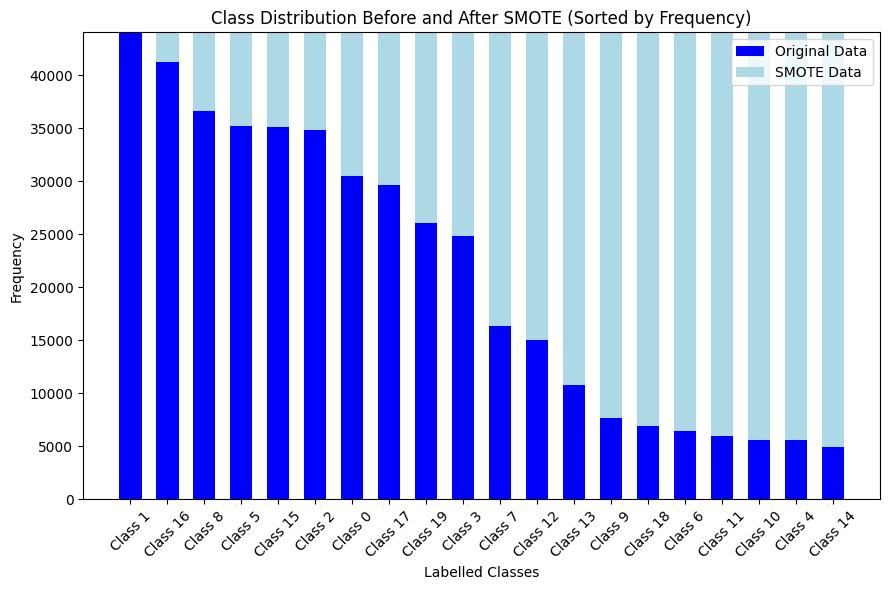

In [ ]:
# Count class distribution before and after SMOTE
original_distribution = Counter(y_train_encoded)
smote_distribution = Counter(y_train_smote)

# Combine counts and sort classes by total count (original + SMOTE)
total_distribution = {cls: original_distribution[cls] + smote_distribution[cls] for cls in smote_distribution.keys()}
sorted_classes = sorted(total_distribution.keys(), key=lambda cls: total_distribution[cls], reverse=True)

# Prepare the data for the graph
original_counts = [original_distribution[cls] for cls in sorted_classes]
smote_counts = [smote_distribution[cls] for cls in sorted_classes]

# Plotting
bar_width = 0.6
x = np.arange(len(sorted_classes))

plt.figure(figsize=(9, 6))
for i, cls in enumerate(sorted_classes):
    plt.bar(
        x[i],
        original_counts[i],
        color='blue',
        width=bar_width,
        label='Original Data' if i == 0 else ""
    )
    plt.bar(
        x[i],
        smote_counts[i] - original_counts[i],
        bottom=original_counts[i],
        color='lightblue',
        width=bar_width,
        label='SMOTE Data' if i == 0 else ""
    )

# Add info
plt.xticks(x, [f"Class {cls}" for cls in sorted_classes], rotation=45)
plt.xlabel("Labelled Classes")
plt.ylabel("Frequency")
plt.title("Class Distribution Before and After SMOTE (Sorted by Frequency)")
plt.legend()
plt.tight_layout()

plt.savefig('smote.png', format='png', bbox_inches='tight', dpi=300)

plt.show()





In [96]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
label_encoder_sampling = LabelEncoder()
y_train_encoded = label_encoder_sampling.fit_transform(y_train)
# Display the class distribution before undersampling
print("Original class distribution:", Counter(y_train_encoded))

# Initialize RandomUnderSampler with a random state for reproducibility
undersampler = RandomUnderSampler(sampling_strategy="auto", random_state=10)

# Apply undersampling to the training set
X_train_under, y_train_under = undersampler.fit_resample(X_train_encoded, y_train_encoded)

# Display the new class distribution
print("Class distribution after undersampling:", Counter(y_train_under))


Original class distribution: Counter({1: 44039, 16: 41273, 8: 36620, 5: 35244, 15: 35086, 2: 34820, 0: 30480, 17: 29685, 19: 26017, 3: 24794, 7: 16309, 12: 15018, 13: 10774, 9: 7687, 18: 6878, 6: 6431, 11: 5937, 10: 5628, 4: 5575, 14: 4974})
Class distribution after undersampling: Counter({0: 4974, 1: 4974, 2: 4974, 3: 4974, 4: 4974, 5: 4974, 6: 4974, 7: 4974, 8: 4974, 9: 4974, 10: 4974, 11: 4974, 12: 4974, 13: 4974, 14: 4974, 15: 4974, 16: 4974, 17: 4974, 18: 4974, 19: 4974})


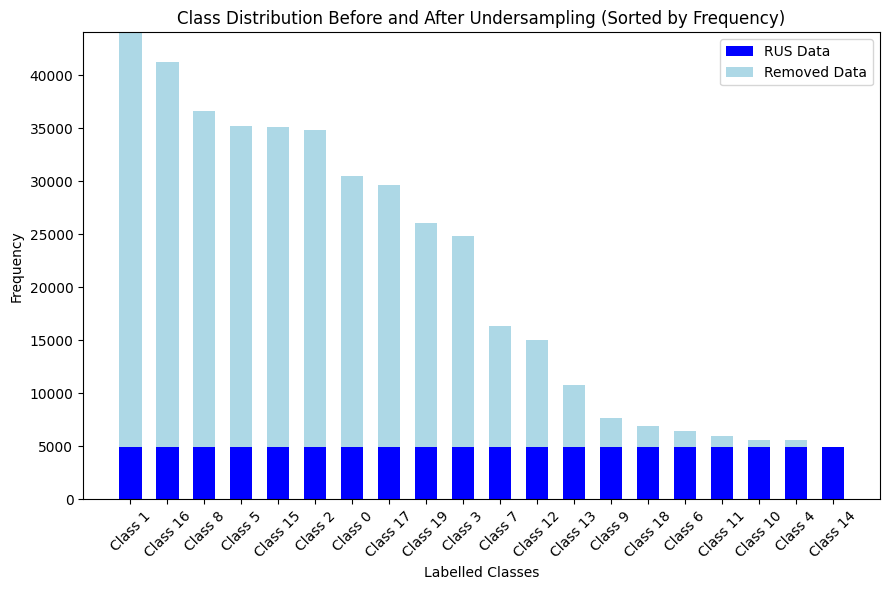

In [ ]:
# Count class distribution before and after undersampling
original_distribution = Counter(y_train_encoded)
undersample_distribution = Counter(y_train_under)

# Combine counts and sort classes by total count (original + undersampled)
total_distribution = {cls: original_distribution[cls] + undersample_distribution[cls] for cls in undersample_distribution.keys()}
sorted_classes = sorted(total_distribution.keys(), key=lambda cls: total_distribution[cls], reverse=True)

# Prepare the data for the graph
original_counts = [original_distribution[cls] for cls in sorted_classes]
undersample_counts = [undersample_distribution[cls] for cls in sorted_classes]

# Plotting
bar_width = 0.6
x = np.arange(len(sorted_classes))

plt.figure(figsize=(9, 6))
for i, cls in enumerate(sorted_classes):
    plt.bar(
        x[i],
        original_counts[i],
        color='blue',
        width=bar_width,
        label='RUS Data' if i == 0 else ""
    )
    plt.bar(
        x[i],
        undersample_counts[i] - original_counts[i],
        bottom=original_counts[i],
        color='lightblue',
        width=bar_width,
        label='Removed Data' if i == 0 else ""
    )

# Add info
plt.xticks(x, [f"Class {cls}" for cls in sorted_classes], rotation=45)
plt.xlabel("Labelled Classes")
plt.ylabel("Frequency")
plt.title("Class Distribution Before and After Undersampling (Sorted by Frequency)")
plt.legend()
plt.tight_layout()


plt.savefig('undersampling.png', format='png', bbox_inches='tight', dpi=300)

plt.show()


In [98]:
# RF with class weight

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(
    random_state=10, 
    n_estimators=200,  
    max_depth=None,    
    min_samples_split=5,  
    n_jobs=-1,
    class_weight="balanced"
)

# Fit the model on the training set
rf.fit(X_train_encoded, y_train)

# Make predictions on the validation set
y_val_pred = rf.predict(X_val_encoded)

# Evaluate the model using a classification report and F1-score
print("Classification Report (Validation Set):")
print(classification_report(y_val, y_val_pred))

# Compute and display the F1 score
val_f1_score = f1_score(y_val, y_val_pred, average='weighted')
print(f"Validation F1 Score: {val_f1_score:.4f}")

# Compute and display the Accuracy score
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")


Classification Report (Validation Set):
                                                precision    recall  f1-score   support

ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT       0.25      0.30      0.27     10160
                      BATTERY - SIMPLE ASSAULT       0.25      0.19      0.22     14680
                         BURGLARY FROM VEHICLE       0.35      0.38      0.36     11607
                Burglary or Attempted Burglary       0.29      0.41      0.34      8265
                        Child-Related Offenses       0.43      0.74      0.54      1858
                    Intimate Partner - Assault       0.27      0.42      0.33     11748
                                   Other Fraud       0.12      0.08      0.10      2144
                         Other General Assault       0.13      0.06      0.08      5436
                    Other Low-Frequency Crimes       0.18      0.06      0.09     12207
                  Other Vehicle-Related Crimes       0.19      0.15      0.16  

In [ ]:
# RF plain

# Initialize the Random Forest Classifier without class weights
rf_no_class_weight = RandomForestClassifier(
    random_state=10,
    n_estimators=200,  
    max_depth=None,    
    min_samples_split=5,  
    n_jobs=-1
)

# Fit the model on the training set
rf_no_class_weight.fit(X_train_encoded, y_train)

# Make predictions on the validation set
y_val_pred_no_class_weight = rf_no_class_weight.predict(X_val_encoded)

# Evaluate the model using a classification report and F1-score
print("Classification Report (Validation Set - No Class Weight):")
print(classification_report(y_val, y_val_pred_no_class_weight))

# Compute and display the F1 score
val_f1_score_no_class_weight = f1_score(y_val, y_val_pred_no_class_weight, average='weighted')
print(f"Validation F1 Score (Plain): {val_f1_score_no_class_weight:.4f}")

# Compute and display the Accuracy score
val_accuracy_no_class_weight = accuracy_score(y_val, y_val_pred_no_class_weight)
print(f"Validation Accuracy (Plain): {val_accuracy_no_class_weight:.4f}")


Classification Report (Validation Set - No Class Weight):
                                                precision    recall  f1-score   support

ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT       0.26      0.29      0.27     10160
                      BATTERY - SIMPLE ASSAULT       0.23      0.30      0.26     14680
                         BURGLARY FROM VEHICLE       0.35      0.42      0.38     11607
                Burglary or Attempted Burglary       0.32      0.37      0.35      8265
                        Child-Related Offenses       0.49      0.69      0.58      1858
                    Intimate Partner - Assault       0.27      0.43      0.33     11748
                                   Other Fraud       0.20      0.03      0.04      2144
                         Other General Assault       0.18      0.03      0.04      5436
                    Other Low-Frequency Crimes       0.17      0.08      0.11     12207
                  Other Vehicle-Related Crimes       0.30    

In [ ]:
# RF with SMOTE

# Initialize the Random Forest Classifier for SMOTE-augmented data
rf_smote = RandomForestClassifier(
    random_state=10,
    n_estimators=200,  
    max_depth=None,    
    min_samples_split=5,  
    n_jobs=-1
)

# Fit the model on the SMOTE-augmented training set
rf_smote.fit(X_train_smote, y_train_smote)

# Make predictions on the validation set
y_val_pred_smote = rf_smote.predict(X_val_encoded)

# Decode the predicted labels back to their original string labels
y_val_pred_smote_decoded = label_encoder_sampling.inverse_transform(y_val_pred_smote)

# Evaluate the model using a classification report and F1-score
print("Classification Report (Validation Set - SMOTE):")
print(classification_report(y_val, y_val_pred_smote_decoded))

# Compute and display the F1 score
val_f1_score_smote = f1_score(y_val, y_val_pred_smote_decoded, average='weighted')
print(f"Validation F1 Score (SMOTE): {val_f1_score_smote:.4f}")

# Compute and display the Accuracy score
val_accuracy_smote = accuracy_score(y_val, y_val_pred_smote_decoded)
print(f"Validation Accuracy (SMOTE): {val_accuracy_smote:.4f}")



Classification Report (Validation Set - SMOTE):
                                                precision    recall  f1-score   support

ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT       0.25      0.29      0.27     10160
                      BATTERY - SIMPLE ASSAULT       0.23      0.25      0.24     14680
                         BURGLARY FROM VEHICLE       0.35      0.39      0.37     11607
                Burglary or Attempted Burglary       0.31      0.38      0.34      8265
                        Child-Related Offenses       0.45      0.73      0.56      1858
                    Intimate Partner - Assault       0.27      0.43      0.33     11748
                                   Other Fraud       0.16      0.06      0.08      2144
                         Other General Assault       0.14      0.03      0.05      5436
                    Other Low-Frequency Crimes       0.17      0.08      0.10     12207
                  Other Vehicle-Related Crimes       0.22      0.12    

In [ ]:
# RF with Undersampled Data

# Initialize the Random Forest Classifier for undersampled data
rf_undersampled = RandomForestClassifier(
    random_state=10,
    n_estimators=200,  
    max_depth=10,    
    min_samples_split=5,  
    n_jobs=-1          
)

# Fit the model on the undersampled training set
rf_undersampled.fit(X_train_under, y_train_under)

# Make predictions on the validation set
y_val_pred_undersampled = rf_undersampled.predict(X_val_encoded)

# Decode the predicted labels back to their original string labels
y_val_pred_undersampled_decoded = label_encoder_sampling.inverse_transform(y_val_pred_undersampled)

# Evaluate the model using a classification report and F1-score
print("Classification Report (Validation Set - Undersampled):")
print(classification_report(y_val, y_val_pred_undersampled_decoded))

# Compute and display the F1 score
val_f1_score_undersampled = f1_score(y_val, y_val_pred_undersampled_decoded, average='weighted')
print(f"Validation F1 Score (Undersampled): {val_f1_score_undersampled:.4f}")

# Compute and display the Accuracy score
val_accuracy_undersampled = accuracy_score(y_val, y_val_pred_undersampled_decoded)
print(f"Validation Accuracy (Undersampled): {val_accuracy_undersampled:.4f}")


Classification Report (Validation Set - Undersampled):
                                                precision    recall  f1-score   support

ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT       0.17      0.29      0.21     10160
                      BATTERY - SIMPLE ASSAULT       0.28      0.01      0.01     14680
                         BURGLARY FROM VEHICLE       0.37      0.13      0.20     11607
                Burglary or Attempted Burglary       0.20      0.30      0.24      8265
                        Child-Related Offenses       0.33      0.85      0.47      1858
                    Intimate Partner - Assault       0.25      0.35      0.29     11748
                                   Other Fraud       0.07      0.27      0.11      2144
                         Other General Assault       0.12      0.00      0.00      5436
                    Other Low-Frequency Crimes       0.21      0.00      0.00     12207
                  Other Vehicle-Related Crimes       0.09      0

In [ ]:
# Encode the target variable
label_encoder_search = LabelEncoder()
y_train_encoded_search = label_encoder_search.fit_transform(y_train)

# Define the parameter grid for Randomized Search
param_dist = {
    "n_estimators": [100, 200, 300],
    "max_depth": [5, 7, 10],
    "learning_rate": [0.01, 0.1, 0.2],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0]
}

# Initialize the base XGBoost Classifier
xgb_base = XGBClassifier(
    objective="multi:softmax",
    num_class=len(np.unique(y_train_encoded_search)),  # Adjust to the number of classes
    eval_metric="mlogloss",
    use_label_encoder=False,
    random_state=10
)

# Set up Randomized Search
random_search = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_dist,
    n_iter=5,  # Number of random parameter combinations to try
    scoring="f1_weighted",
    verbose=2,
    random_state=10,
    n_jobs=-1  # Use all available processors
)

# Fit Randomized Search on the training data
random_search.fit(X_train_encoded, y_train_encoded_search)

# Output the best hyperparameters
best_params = random_search.best_params_
print(f"Best Hyperparameters: {best_params}")




In [ ]:
# XGBOOST plain

# Initialize and fit the LabelEncoder on the training target
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)  # Transform validation target
y_test_encoded = label_encoder.transform(y_test)  # Transform test target

# Initialize the XGBoost Classifier
xgb = XGBClassifier(
    objective="multi:softmax",  
    num_class=len(label_encoder.classes_),  
    eval_metric="mlogloss",    
    use_label_encoder=False,   
    n_estimators=300,          
    max_depth=10,              
    learning_rate=0.1,         
    subsample=0.8,             
    colsample_bytree=0.8,      
    random_state=10
)

# Fit the model on the encoded training set
xgb.fit(X_train_encoded, y_train_encoded)

# Make predictions on the validation set
y_val_pred_encoded = xgb.predict(X_val_encoded)

# Decode predictions back to original string labels (optional)
y_val_pred = label_encoder.inverse_transform(y_val_pred_encoded)

# Evaluate the model
print("Classification Report (Validation Set):")
print(classification_report(y_val, y_val_pred))

# Compute F1 Score
val_f1_score = f1_score(y_val, y_val_pred, average='weighted')
print(f"Validation F1 Score: {val_f1_score:.4f}")

# Compute Accuracy
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")



c:\Users\rubin\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:46:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report (Validation Set):
                                                precision    recall  f1-score   support

ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT       0.29      0.31      0.30     10160
                      BATTERY - SIMPLE ASSAULT       0.27      0.33      0.30     14680
                         BURGLARY FROM VEHICLE       0.38      0.51      0.43     11607
                Burglary or Attempted Burglary       0.37      0.46      0.41      8265
                        Child-Related Offenses       0.54      0.63      0.58      1858
                    Intimate Partner - Assault       0.30      0.48      0.37     11748
                                   Other Fraud       0.19      0.04      0.06      2144
                         Other General Assault       0.20      0.02      0.04      5436
                    Other Low-Frequency Crimes       0.20      0.07      0.11     12207
                  Other Vehicle-Related Crimes       0.32      0.09      0.14  

In [ ]:
# XGBOOST with SMOTE

# Initialize a new XGBoost Classifier for the SMOTE-resampled data
xgb_smote = XGBClassifier(
    objective="multi:softmax",  
    num_class=len(np.unique(y_train_smote)),  
    eval_metric="mlogloss",    
    use_label_encoder=False,   
    n_estimators=300,          
    max_depth=10,              
    learning_rate=0.1,         
    subsample=0.8,             
    colsample_bytree=0.8,      
    random_state=10
)

# Train the new model on the SMOTE-resampled dataset
xgb_smote.fit(X_train_smote, y_train_smote)

# Make predictions on the validation set
y_val_pred_encoded_smote = xgb_smote.predict(X_val_encoded)

# Decode predictions back to original string labels
y_val_pred_smote = label_encoder_sampling.inverse_transform(y_val_pred_encoded_smote)

# Evaluate the model
print("Classification Report (Validation Set - SMOTE):")
print(classification_report(y_val, y_val_pred_smote))

# Compute F1 Score
val_f1_score_smote = f1_score(y_val, y_val_pred_smote, average='weighted')
print(f"Validation F1 Score (SMOTE): {val_f1_score_smote:.4f}")

# Compute Accuracy
val_accuracy_smote = accuracy_score(y_val, y_val_pred_smote)
print(f"Validation Accuracy (SMOTE): {val_accuracy_smote:.4f}")


c:\Users\rubin\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:51:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report (Validation Set - SMOTE):
                                                precision    recall  f1-score   support

ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT       0.28      0.30      0.29     10160
                      BATTERY - SIMPLE ASSAULT       0.27      0.30      0.28     14680
                         BURGLARY FROM VEHICLE       0.38      0.49      0.43     11607
                Burglary or Attempted Burglary       0.37      0.46      0.41      8265
                        Child-Related Offenses       0.51      0.65      0.57      1858
                    Intimate Partner - Assault       0.30      0.47      0.36     11748
                                   Other Fraud       0.18      0.06      0.09      2144
                         Other General Assault       0.19      0.04      0.06      5436
                    Other Low-Frequency Crimes       0.19      0.07      0.10     12207
                  Other Vehicle-Related Crimes       0.27      0.12    

In [ ]:
# XGBOOST with Undersampling

# Initialize a new XGBoost Classifier for the undersampled data
xgb_undersampled = XGBClassifier(
    objective="multi:softmax",  
    num_class=len(np.unique(y_train_under)),  
    eval_metric="mlogloss",    
    use_label_encoder=False,   
    n_estimators=300,          
    max_depth=10,              
    learning_rate=0.1,         
    subsample=0.8,             
    colsample_bytree=0.8,      
    random_state=10
)

# Train the model on the undersampled dataset
xgb_undersampled.fit(X_train_under, y_train_under)

# Make predictions on the validation set
y_val_pred_encoded_under = xgb_undersampled.predict(X_val_encoded)

# Decode predictions back to original string labels
y_val_pred_under = label_encoder_sampling.inverse_transform(y_val_pred_encoded_under)

# Evaluate the model
print("Classification Report (Validation Set - Undersampling):")
print(classification_report(y_val, y_val_pred_under))

# Compute F1 Score
val_f1_score_under = f1_score(y_val, y_val_pred_under, average='weighted')
print(f"Validation F1 Score (Undersampling): {val_f1_score_under:.4f}")

# Compute Accuracy
val_accuracy_under = accuracy_score(y_val, y_val_pred_under)
print(f"Validation Accuracy (Undersampling): {val_accuracy_under:.4f}")


c:\Users\rubin\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:00:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report (Validation Set - Undersampling):
                                                precision    recall  f1-score   support

ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT       0.25      0.20      0.22     10160
                      BATTERY - SIMPLE ASSAULT       0.26      0.09      0.14     14680
                         BURGLARY FROM VEHICLE       0.39      0.36      0.38     11607
                Burglary or Attempted Burglary       0.34      0.35      0.35      8265
                        Child-Related Offenses       0.38      0.78      0.52      1858
                    Intimate Partner - Assault       0.30      0.27      0.28     11748
                                   Other Fraud       0.09      0.32      0.14      2144
                         Other General Assault       0.10      0.09      0.09      5436
                    Other Low-Frequency Crimes       0.16      0.05      0.07     12207
                  Other Vehicle-Related Crimes       0.12      

In [ ]:
#XGBOOST with class weights

# Initialize and fit the LabelEncoder on the training target
label_encoder_weights = LabelEncoder()
y_train_encoded_weights = label_encoder_weights.fit_transform(y_train)
y_val_encoded_weights = label_encoder_weights.transform(y_val)  # Transform validation target
y_test_encoded_weights = label_encoder_weights.transform(y_test)  # Transform test target

# Compute class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_encoded_weights),
    y=y_train_encoded_weights
)

# Map class weights to each instance in the training set
sample_weights = np.array([class_weights[label] for label in y_train_encoded_weights])

# Initialize the XGBoost Classifier
xgb_weights = XGBClassifier(
    objective="multi:softmax",  
    num_class=len(label_encoder_weights.classes_),  
    eval_metric="mlogloss",    
    use_label_encoder=False,   
    n_estimators=200,          
    max_depth=10,              
    learning_rate=0.1,         
    subsample=0.8,             
    colsample_bytree=0.8,      
    random_state=10
)

# Fit the model on the encoded training set with class weights
xgb_weights.fit(X_train_encoded, y_train_encoded_weights, sample_weight=sample_weights)

# Make predictions on the validation set
y_val_pred_encoded_weights = xgb_weights.predict(X_val_encoded)

# Decode predictions back to original string labels (optional)
y_val_pred_weights = label_encoder_weights.inverse_transform(y_val_pred_encoded_weights)

# Evaluate the model
print("Classification Report (Validation Set with Class Weights):")
print(classification_report(y_val, y_val_pred_weights))

# Compute F1 Score
val_f1_score_weights = f1_score(y_val, y_val_pred_weights, average='weighted')
print(f"Validation F1 Score (with Class Weights): {val_f1_score_weights:.4f}")

# Compute Accuracy
val_accuracy_weights = accuracy_score(y_val, y_val_pred_weights)
print(f"Validation Accuracy (with Class Weights): {val_accuracy_weights:.4f}")


c:\Users\rubin\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:02:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report (Validation Set with Class Weights):
                                                precision    recall  f1-score   support

ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT       0.28      0.26      0.27     10160
                      BATTERY - SIMPLE ASSAULT       0.32      0.14      0.19     14680
                         BURGLARY FROM VEHICLE       0.41      0.43      0.42     11607
                Burglary or Attempted Burglary       0.36      0.44      0.40      8265
                        Child-Related Offenses       0.44      0.73      0.55      1858
                    Intimate Partner - Assault       0.31      0.38      0.34     11748
                                   Other Fraud       0.10      0.29      0.15      2144
                         Other General Assault       0.14      0.09      0.11      5436
                    Other Low-Frequency Crimes       0.21      0.03      0.05     12207
                  Other Vehicle-Related Crimes       0.15   

In [106]:
# KNN plain

# Initialize and fit the LabelEncoder with a unique name
label_encoder1 = LabelEncoder()
y_train_encoded = label_encoder1.fit_transform(y_train)
y_val_encoded = label_encoder1.transform(y_val)

# Initialize the KNN classifier
knn = KNeighborsClassifier(
    n_neighbors=5, 
    weights='uniform', 
    algorithm='auto', 
    metric='minkowski', 
    p=2
)

# Train the KNN model
knn.fit(X_train_encoded, y_train_encoded)

# Make predictions on the validation set
y_val_knn_encoded = knn.predict(X_val_encoded)

# Evaluate the KNN model using encoded labels
knn_f1_weighted = f1_score(y_val_encoded, y_val_knn_encoded, average='weighted')
knn_accuracy = accuracy_score(y_val_encoded, y_val_knn_encoded)
knn_classification_report = classification_report(y_val_encoded, y_val_knn_encoded, target_names=label_encoder1.classes_)

# Decode predictions back to original labels for optional human-readable outputs
y_val_knn_decoded = label_encoder1.inverse_transform(y_val_knn_encoded)

# Print the evaluation metrics
print("KNN Classification Report (Validation Set):")
print(knn_classification_report)
print(f"KNN Weighted F1 Score: {knn_f1_weighted:.4f}")
print(f"KNN Accuracy: {knn_accuracy:.4f}")


KNN Classification Report (Validation Set):
                                                precision    recall  f1-score   support

ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT       0.17      0.32      0.22     10160
                      BATTERY - SIMPLE ASSAULT       0.19      0.29      0.23     14680
                         BURGLARY FROM VEHICLE       0.31      0.42      0.36     11607
                Burglary or Attempted Burglary       0.27      0.35      0.30      8265
                        Child-Related Offenses       0.43      0.29      0.34      1858
                    Intimate Partner - Assault       0.24      0.28      0.26     11748
                                   Other Fraud       0.08      0.04      0.05      2144
                         Other General Assault       0.10      0.05      0.06      5436
                    Other Low-Frequency Crimes       0.15      0.10      0.12     12207
                  Other Vehicle-Related Crimes       0.20      0.09      0.

In [107]:
# KNN with SMOTE

# Initialize the KNN classifier for SMOTE-augmented data
knn_smote = KNeighborsClassifier(
    n_neighbors=5, 
    weights='uniform', 
    algorithm='auto', 
    metric='minkowski', 
    p=2
)

# Train the KNN model on the SMOTE-augmented training set
knn_smote.fit(X_train_smote, y_train_smote)

# Make predictions on the validation set
y_val_knn_pred_smote_encoded = knn_smote.predict(X_val_encoded)

# Decode predictions back to original labels
y_val_knn_pred_smote_decoded = label_encoder.inverse_transform(y_val_knn_pred_smote_encoded)

# Evaluate the KNN model using the SMOTE-augmented training set
knn_smote_f1_weighted = f1_score(y_val, y_val_knn_pred_smote_decoded, average='weighted')
knn_smote_accuracy = accuracy_score(y_val, y_val_knn_pred_smote_decoded)
knn_smote_classification_report = classification_report(
    y_val, y_val_knn_pred_smote_decoded, target_names=label_encoder.classes_
)

# Print the evaluation metrics
print("KNN Classification Report (Validation Set - SMOTE):")
print(knn_smote_classification_report)
print(f"KNN Weighted F1 Score (SMOTE): {knn_smote_f1_weighted:.4f}")
print(f"KNN Accuracy (SMOTE): {knn_smote_accuracy:.4f}")


KNN Classification Report (Validation Set - SMOTE):
                                                precision    recall  f1-score   support

ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT       0.18      0.25      0.21     10160
                      BATTERY - SIMPLE ASSAULT       0.21      0.15      0.18     14680
                         BURGLARY FROM VEHICLE       0.33      0.34      0.34     11607
                Burglary or Attempted Burglary       0.26      0.32      0.29      8265
                        Child-Related Offenses       0.31      0.49      0.38      1858
                    Intimate Partner - Assault       0.25      0.23      0.24     11748
                                   Other Fraud       0.06      0.14      0.08      2144
                         Other General Assault       0.08      0.11      0.09      5436
                    Other Low-Frequency Crimes       0.15      0.08      0.10     12207
                  Other Vehicle-Related Crimes       0.10      0.21

In [108]:
# KNN with Undersampling

# Initialize the KNN classifier for undersampled data
knn_undersampled = KNeighborsClassifier(
    n_neighbors=5, 
    weights='uniform', 
    algorithm='auto', 
    metric='minkowski', 
    p=2
)

# Train the KNN model on the undersampled training set
knn_undersampled.fit(X_train_under, y_train_under)

# Make predictions on the validation set
y_val_knn_pred_under_encoded = knn_undersampled.predict(X_val_encoded)

# Decode predictions back to original labels
y_val_knn_pred_under_decoded = label_encoder_sampling.inverse_transform(y_val_knn_pred_under_encoded)

# Evaluate the KNN model using the undersampled training set
knn_under_f1_weighted = f1_score(y_val, y_val_knn_pred_under_decoded, average='weighted')
knn_under_accuracy = accuracy_score(y_val, y_val_knn_pred_under_decoded)
knn_under_classification_report = classification_report(
    y_val, y_val_knn_pred_under_decoded, target_names=label_encoder_sampling.classes_
)

# Print the evaluation metrics
print("KNN Classification Report (Validation Set - Undersampling):")
print(knn_under_classification_report)
print(f"KNN Weighted F1 Score (Undersampling): {knn_under_f1_weighted:.4f}")
print(f"KNN Accuracy (Undersampling): {knn_under_accuracy:.4f}")


KNN Classification Report (Validation Set - Undersampling):
                                                precision    recall  f1-score   support

ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT       0.15      0.25      0.18     10160
                      BATTERY - SIMPLE ASSAULT       0.16      0.14      0.15     14680
                         BURGLARY FROM VEHICLE       0.29      0.34      0.31     11607
                Burglary or Attempted Burglary       0.20      0.29      0.24      8265
                        Child-Related Offenses       0.19      0.49      0.27      1858
                    Intimate Partner - Assault       0.20      0.15      0.17     11748
                                   Other Fraud       0.05      0.18      0.08      2144
                         Other General Assault       0.07      0.06      0.06      5436
                    Other Low-Frequency Crimes       0.14      0.05      0.07     12207
                  Other Vehicle-Related Crimes       0.10  

 # TEST SET EVALUATION


In [109]:
#XGBOOST

# Make predictions on the test set
y_test_pred_xgb_encoded = xgb.predict(X_test_encoded)

# Decode predictions back to original string labels
y_test_pred_xgb = label_encoder.inverse_transform(y_test_pred_xgb_encoded)

# Evaluate the model on the test set
print("Classification Report (Test Set):")
print(classification_report(y_test, y_test_pred_xgb))

# Compute F1 Score on the test set
test_f1_score = f1_score(y_test, y_test_pred_xgb, average='weighted')
print(f"Test F1 Score: {test_f1_score:.4f}")

# Compute Accuracy on the test set
test_accuracy = accuracy_score(y_test, y_test_pred_xgb)
print(f"Test Accuracy: {test_accuracy:.4f}")


Classification Report (Test Set):
                                                precision    recall  f1-score   support

ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT       0.29      0.31      0.30     10160
                      BATTERY - SIMPLE ASSAULT       0.27      0.31      0.29     14680
                         BURGLARY FROM VEHICLE       0.38      0.50      0.43     11606
                Burglary or Attempted Burglary       0.37      0.46      0.41      8265
                        Child-Related Offenses       0.55      0.63      0.59      1858
                    Intimate Partner - Assault       0.30      0.49      0.37     11748
                                   Other Fraud       0.20      0.04      0.07      2144
                         Other General Assault       0.20      0.02      0.04      5436
                    Other Low-Frequency Crimes       0.20      0.07      0.11     12207
                  Other Vehicle-Related Crimes       0.33      0.10      0.16      25

<Figure size 1200x1000 with 0 Axes>

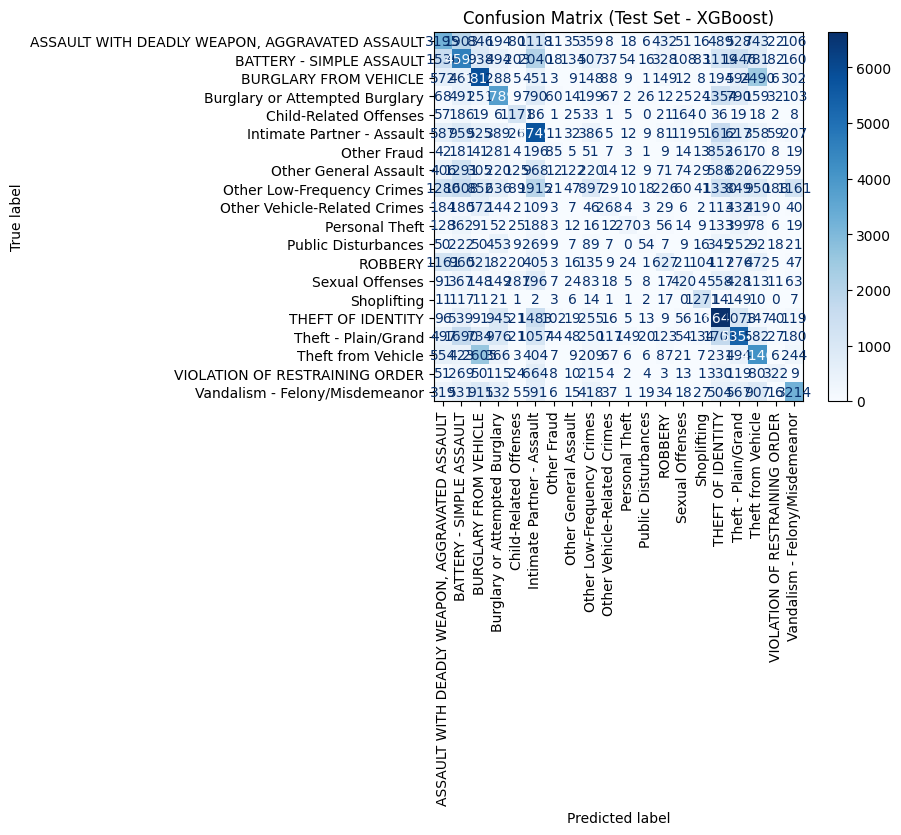

In [ ]:
# Compute the confusion matrix for XGBoost predictions
cm_xgb = confusion_matrix(y_test, y_test_pred_xgb, labels=label_encoder.classes_)

# Plot the confusion matrix
plt.figure(figsize=(12, 10))
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=label_encoder.classes_)
disp_xgb.plot(cmap=plt.cm.Blues, xticks_rotation='vertical', values_format='d')
plt.title("Confusion Matrix (Test Set - XGBoost)")
plt.show()


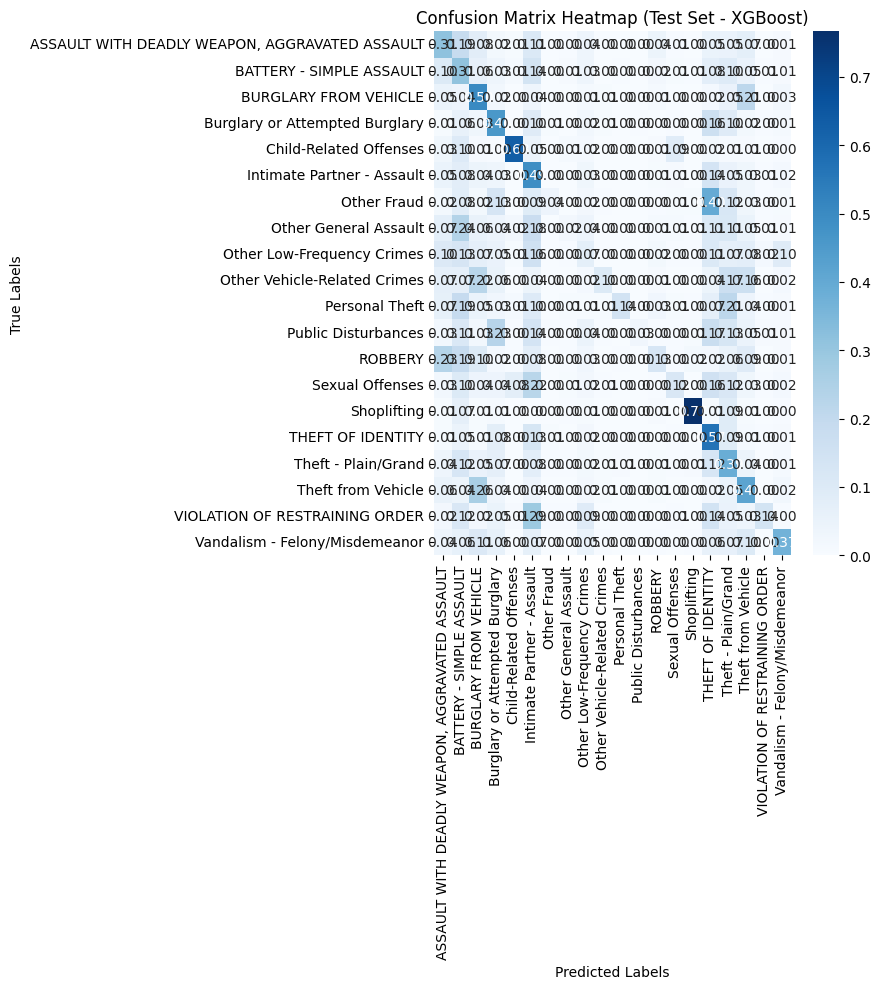

In [ ]:
# Compute the confusion matrix for XGBoost predictions
cm_xgb = confusion_matrix(y_test, y_test_pred_xgb, labels=label_encoder.classes_)

# Normalize the confusion matrix to display proportions
cm_xgb_normalized = cm_xgb.astype('float') / cm_xgb.sum(axis=1)[:, np.newaxis]

# Plot the heatmap
plt.figure(figsize=(9, 10))
sns.heatmap(cm_xgb_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix Heatmap (Test Set - XGBoost)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


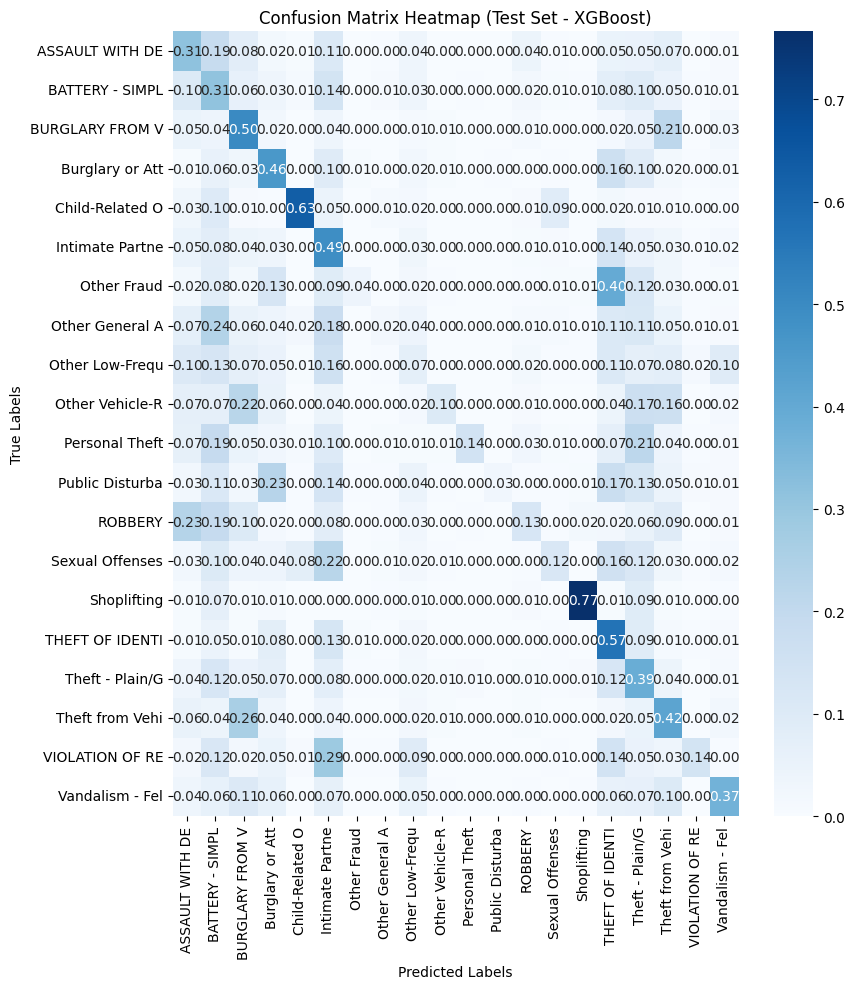

In [ ]:
# Cap the label names to a fixed length for readability
max_label_length = 15
truncated_labels = [label[:max_label_length] for label in label_encoder.classes_]

# Compute the confusion matrix for XGBoost predictions
cm_xgb = confusion_matrix(y_test, y_test_pred_xgb, labels=label_encoder.classes_)

# Normalize the confusion matrix to display proportions
cm_xgb_normalized = cm_xgb.astype('float') / cm_xgb.sum(axis=1)[:, np.newaxis]

# Plot the heatmap
plt.figure(figsize=(9, 10))
sns.heatmap(
    cm_xgb_normalized,
    annot=True,
    fmt='.2f',
    cmap='Blues',
    xticklabels=truncated_labels,
    yticklabels=truncated_labels
)
plt.title("Confusion Matrix Heatmap (Test Set - XGBoost)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.xticks(rotation=90)
plt.tight_layout()

plt.savefig('confusion_matrix.png', format='png', bbox_inches='tight', dpi=300)

plt.show()


In [113]:
# RANDOM FOREST

# Make predictions on the test set
y_test_pred_no_class_weight = rf_no_class_weight.predict(X_test_encoded)

# Evaluate the model on the test set
print("Classification Report (Test Set - No Class Weight):")
print(classification_report(y_test, y_test_pred_no_class_weight))

# Compute F1 Score on the test set
test_f1_score_no_class_weight = f1_score(y_test, y_test_pred_no_class_weight, average='weighted')
print(f"Test F1 Score (No Class Weight): {test_f1_score_no_class_weight:.4f}")

# Compute Accuracy on the test set
test_accuracy_no_class_weight = accuracy_score(y_test, y_test_pred_no_class_weight)
print(f"Test Accuracy (No Class Weight): {test_accuracy_no_class_weight:.4f}")

Classification Report (Test Set - No Class Weight):
                                                precision    recall  f1-score   support

ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT       0.26      0.29      0.28     10160
                      BATTERY - SIMPLE ASSAULT       0.22      0.29      0.25     14680
                         BURGLARY FROM VEHICLE       0.35      0.42      0.38     11606
                Burglary or Attempted Burglary       0.33      0.38      0.35      8265
                        Child-Related Offenses       0.50      0.69      0.58      1858
                    Intimate Partner - Assault       0.27      0.43      0.33     11748
                                   Other Fraud       0.21      0.03      0.05      2144
                         Other General Assault       0.18      0.03      0.04      5436
                    Other Low-Frequency Crimes       0.18      0.09      0.11     12207
                  Other Vehicle-Related Crimes       0.30      0.06

In [114]:
# KNN

# Make predictions on the test set using the KNN model
y_test_knn_encoded = knn.predict(X_test_encoded)

# Evaluate the KNN model using encoded labels on the test set
knn_test_f1_weighted = f1_score(y_test_encoded, y_test_knn_encoded, average='weighted')
knn_test_accuracy = accuracy_score(y_test_encoded, y_test_knn_encoded)
knn_test_classification_report = classification_report(
    y_test_encoded, y_test_knn_encoded, target_names=label_encoder1.classes_
)


y_test_knn_decoded = label_encoder1.inverse_transform(y_test_knn_encoded)

# Print the evaluation metrics
print("KNN Classification Report (Test Set):")
print(knn_test_classification_report)
print(f"KNN Weighted F1 Score (Test Set): {knn_test_f1_weighted:.4f}")
print(f"KNN Accuracy (Test Set): {knn_test_accuracy:.4f}")


KNN Classification Report (Test Set):
                                                precision    recall  f1-score   support

ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT       0.17      0.32      0.22     10160
                      BATTERY - SIMPLE ASSAULT       0.18      0.27      0.22     14680
                         BURGLARY FROM VEHICLE       0.32      0.43      0.36     11606
                Burglary or Attempted Burglary       0.27      0.34      0.30      8265
                        Child-Related Offenses       0.41      0.29      0.34      1858
                    Intimate Partner - Assault       0.24      0.28      0.25     11748
                                   Other Fraud       0.08      0.05      0.06      2144
                         Other General Assault       0.09      0.04      0.06      5436
                    Other Low-Frequency Crimes       0.15      0.11      0.12     12207
                  Other Vehicle-Related Crimes       0.20      0.09      0.13    

In [ ]:

# Most Frequent Baseline Classifier (Test Set)
most_frequent_class_test = baseline_label_encoder.transform(
    [y_train.value_counts().idxmax()] * len(y_test)
)

# Compute metrics for the most frequent baseline on the test set
baseline_f1_most_frequent_test = f1_score(
    y_test_encoded, most_frequent_class_test, average="weighted"
)
baseline_accuracy_most_frequent_test = accuracy_score(
    y_test_encoded, most_frequent_class_test
)
baseline_precision_most_frequent_test = precision_score(
    y_test_encoded, most_frequent_class_test, average="weighted"
)
baseline_recall_most_frequent_test = recall_score(
    y_test_encoded, most_frequent_class_test, average="weighted"
)

print(f"Baseline F1 Score (Most Frequent Class, Test Set): {baseline_f1_most_frequent_test:.4f}")
print(f"Baseline Accuracy (Most Frequent Class, Test Set): {baseline_accuracy_most_frequent_test:.4f}")
print(f"Baseline Precision (Most Frequent Class, Test Set): {baseline_precision_most_frequent_test:.4f}")
print(f"Baseline Recall (Most Frequent Class, Test Set): {baseline_recall_most_frequent_test:.4f}")

# Random Baseline Classifier (Test Set)
random_baseline_test = DummyClassifier(strategy="uniform", random_state=42)
random_baseline_test.fit(X_train_encoded, y_train_encoded_baseline)
y_test_baseline_random = random_baseline_test.predict(X_test_encoded)

# Compute metrics for the random baseline on the test set
baseline_f1_random_test = f1_score(
    y_test_encoded, y_test_baseline_random, average="weighted"
)
baseline_accuracy_random_test = accuracy_score(y_test_encoded, y_test_baseline_random)
baseline_precision_random_test = precision_score(
    y_test_encoded, y_test_baseline_random, average="weighted"
)
baseline_recall_random_test = recall_score(
    y_test_encoded, y_test_baseline_random, average="weighted"
)

print(f"Baseline F1 Score (Random Classifier, Test Set): {baseline_f1_random_test:.4f}")
print(f"Baseline Accuracy (Random Classifier, Test Set): {baseline_accuracy_random_test:.4f}")
print(f"Baseline Precision (Random Classifier, Test Set): {baseline_precision_random_test:.4f}")
print(f"Baseline Recall (Random Classifier, Test Set): {baseline_recall_random_test:.4f}")


c:\Users\rubin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Baseline F1 Score (Most Frequent Class, Test Set): 0.0196
Baseline Accuracy (Most Frequent Class, Test Set): 0.1040
Baseline Precision (Most Frequent Class, Test Set): 0.0108
Baseline Recall (Most Frequent Class, Test Set): 0.1040
Baseline F1 Score (Random Classifier, Test Set): 0.0560
Baseline Accuracy (Random Classifier, Test Set): 0.0502
Baseline Precision (Random Classifier, Test Set): 0.0710
Baseline Recall (Random Classifier, Test Set): 0.0502


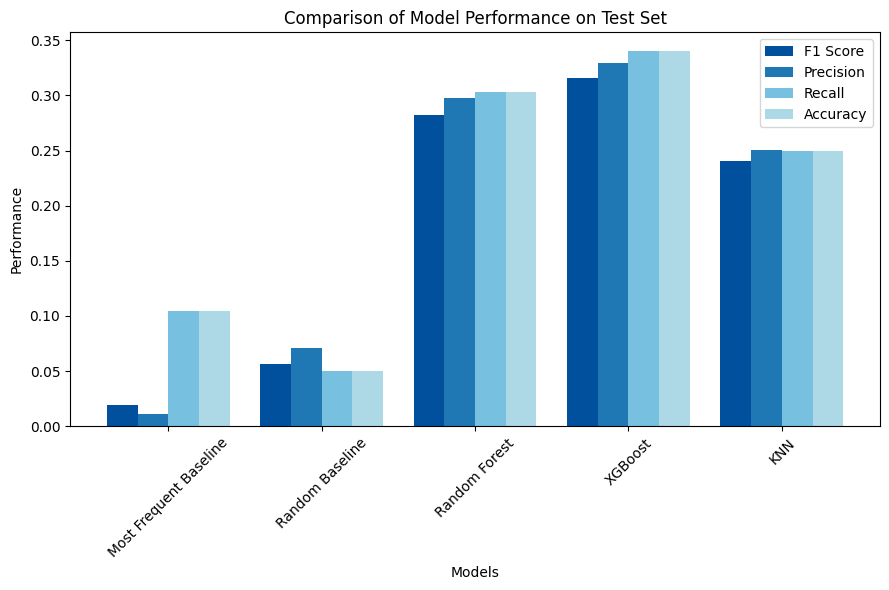

In [116]:


# Performance metrics for each model
models = ['Most Frequent Baseline', 'Random Baseline', 'Random Forest', 'XGBoost', 'KNN']

# Metrics for each model (fill these with your computed values)
f1_scores = [
    baseline_f1_most_frequent_test,  # Most Frequent
    baseline_f1_random_test,        # Random Baseline
    test_f1_score_no_class_weight,  # Random Forest
    test_f1_score,                  # XGBoost
    knn_test_f1_weighted            # KNN
]

precision_scores = [
    baseline_precision_most_frequent_test,
    baseline_precision_random_test,
    precision_score(y_test, y_test_pred_no_class_weight, average='weighted'),
    precision_score(y_test, y_test_pred_xgb, average='weighted'),
    precision_score(y_test_encoded, y_test_knn_encoded, average='weighted')
]

recall_scores = [
    baseline_recall_most_frequent_test,
    baseline_recall_random_test,
    recall_score(y_test, y_test_pred_no_class_weight, average='weighted'),
    recall_score(y_test, y_test_pred_xgb, average='weighted'),
    recall_score(y_test_encoded, y_test_knn_encoded, average='weighted')
]

accuracy_scores = [
    baseline_accuracy_most_frequent_test,
    baseline_accuracy_random_test,
    test_accuracy_no_class_weight,
    test_accuracy,
    knn_test_accuracy
]

# Bar chart parameters
x = np.arange(len(models))  # Number of models
bar_width = 0.2

# Colors for the bars (more distinguishable shades of blue)
colors = ['#00509e', '#1f77b4', '#78c0e0', '#add8e6']

# Create the grouped bar chart
plt.figure(figsize=(9, 6))

# Add bars for each metric
plt.bar(x - bar_width * 1.5, f1_scores, width=bar_width, label='F1 Score', color=colors[0])
plt.bar(x - bar_width / 2, precision_scores, width=bar_width, label='Precision', color=colors[1])
plt.bar(x + bar_width / 2, recall_scores, width=bar_width, label='Recall', color=colors[2])
plt.bar(x + bar_width * 1.5, accuracy_scores, width=bar_width, label='Accuracy', color=colors[3])

# Add labels and title
plt.xticks(x, models, rotation=45)
plt.xlabel('Models')
plt.ylabel('Performance')
plt.title('Comparison of Model Performance on Test Set')
plt.legend()


# Show plot
plt.tight_layout()

plt.savefig('model_performance.png', format='png', bbox_inches='tight', dpi=300)

plt.show()




# SHAP EXPLANATIONS

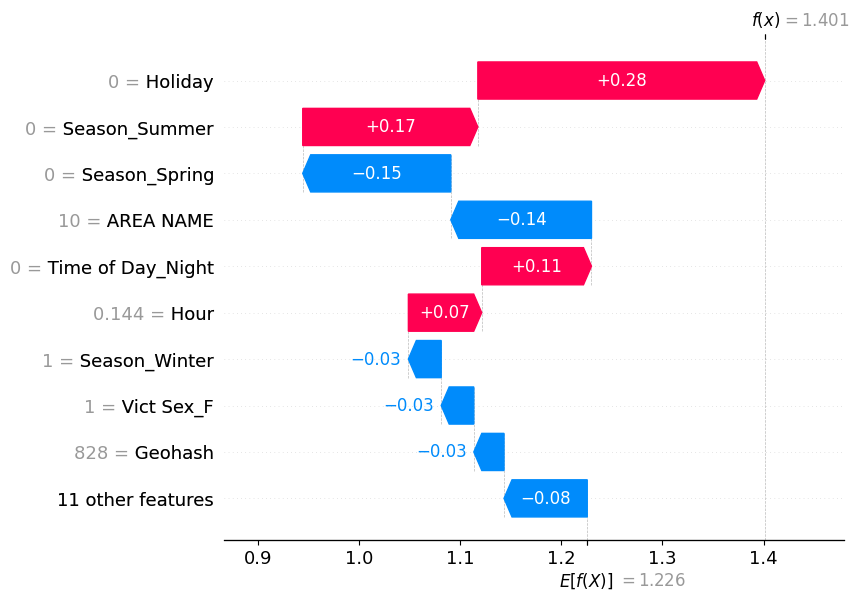

In [ ]:

# Create a SHAP explainer
explainer = shap.TreeExplainer(xgb)

# Use a subset of the validation data for SHAP analysis
sample_size = 1000  # manageable number of samples
X_test_sample = X_test_encoded[:sample_size]

# Compute SHAP values
shap_values = explainer.shap_values(X_test_sample)

# Choose the first prediction and the first class
sample_index = 10  # Index of the sample to explain
class_index = 1   # Index of the class to explain

# Extract SHAP values for the chosen sample and class
shap_values_for_class = shap_values[class_index]  # SHAP values for the first class
shap_values_sample = shap_values_for_class[sample_index]  # SHAP values for the chosen sample

fig = plt.figure(figsize=(9, 7))

# Create a SHAP waterfall plot
shap.waterfall_plot(
    shap.Explanation(
        values=shap_values_sample,
        base_values=explainer.expected_value[class_index],  # Base value for the chosen class
        feature_names=X_test_sample.columns,
        data=X_test_sample.iloc[sample_index]
    )
    
)

# Save the plot as a PNG
fig.savefig('shap_waterfall_instance.png', dpi=300, bbox_inches='tight')
plt.close(fig) 


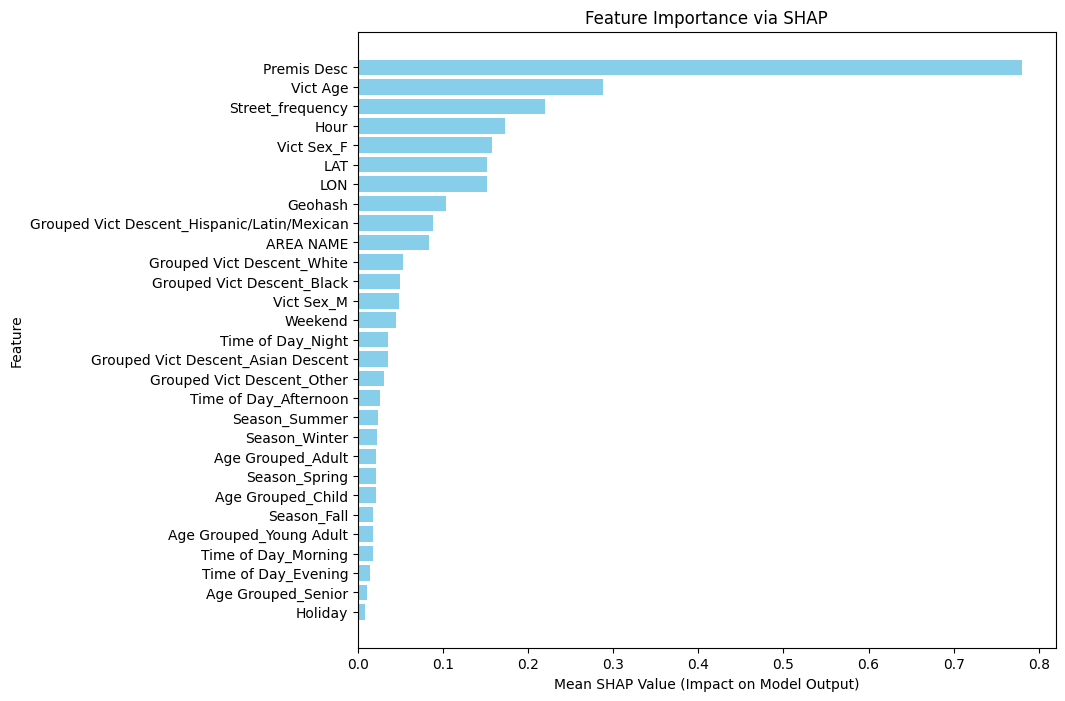

In [ ]:

# Aggregate SHAP values across all classes use the mean absolute value
shap_values_mean = np.abs(shap_values).mean(axis=2)  # Aggregate over classes

# Convert SHAP values to DataFrame
shap_df = pd.DataFrame(shap_values_mean, columns=X_test_sample.columns)

# Calculate the mean absolute SHAP value for each feature
mean_abs_shap_values = shap_df.abs().mean(axis=0).sort_values(ascending=False)

# Create a customized bar plot
plt.figure(figsize=(9, 8))
plt.barh(mean_abs_shap_values.index, mean_abs_shap_values.values, color="skyblue")
plt.xlabel("Mean SHAP Value (Impact on Model Output)")
plt.ylabel("Feature")
plt.title("Feature Importance via SHAP")
plt.gca().invert_yaxis()  
plt.show()



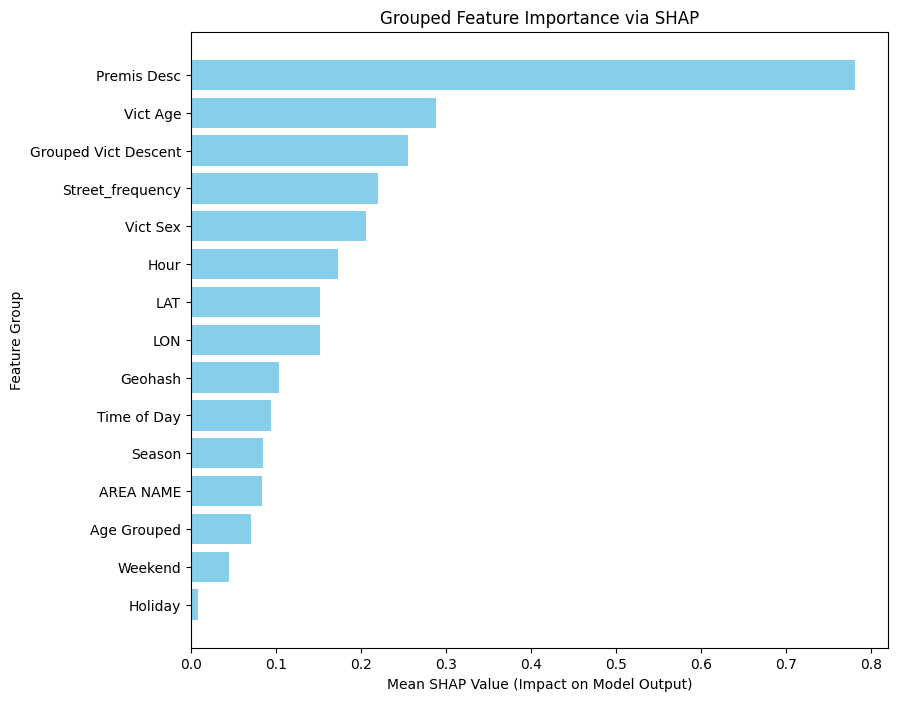

In [120]:
# Example of grouping features into logical groups
feature_groups = {
    "Vict Sex": ["Vict Sex_F", "Vict Sex_M"],
    "Season": ["Season_Fall", "Season_Spring", "Season_Summer", "Season_Winter"],
    "Time of Day": ["Time of Day_Morning", "Time of Day_Afternoon", "Time of Day_Evening", "Time of Day_Night"],
    "Age Grouped": ["Age Grouped_Senior", "Age Grouped_Adult", "Age Grouped_Young Adult", "Age Grouped_Child"],
    "Grouped Vict Descent": ['Grouped Vict Descent_Asian Descent', 'Grouped Vict Descent_Black',
       'Grouped Vict Descent_Hispanic/Latin/Mexican',
       'Grouped Vict Descent_Other', 'Grouped Vict Descent_White']
}

# Compute SHAP values
shap_values = explainer.shap_values(X_test_sample)

# Aggregate SHAP values across all classes (e.g., take mean absolute value)
shap_values_mean = np.abs(shap_values).mean(axis=2)  # Aggregate over classes

# Convert SHAP values to DataFrame
shap_df = pd.DataFrame(shap_values_mean, columns=X_test_sample.columns)

# Calculate the mean absolute SHAP value for each feature
mean_abs_shap_values = shap_df.abs().mean(axis=0).sort_values(ascending=False)

# Aggregate SHAP values for the groups
grouped_shap_values = {}
for group, features in feature_groups.items():
    grouped_shap_values[group] = shap_df[features].sum(axis=1)  # Sum SHAP values for grouped features

# Add remaining features not in any group
ungrouped_features = [col for col in shap_df.columns if col not in sum(feature_groups.values(), [])]
for feature in ungrouped_features:
    grouped_shap_values[feature] = shap_df[feature]

# Convert the grouped SHAP values into a DataFrame
grouped_shap_df = pd.DataFrame(grouped_shap_values)

# Calculate mean SHAP values for the groups
mean_abs_grouped_shap_values = grouped_shap_df.abs().mean(axis=0).sort_values(ascending=False)

# Create the customized bar plot
plt.figure(figsize=(9, 8))
plt.barh(mean_abs_grouped_shap_values.index, mean_abs_grouped_shap_values.values, color="skyblue")
plt.xlabel("Mean SHAP Value (Impact on Model Output)")
plt.ylabel("Feature Group")
plt.title("Grouped Feature Importance via SHAP")
plt.gca().invert_yaxis()

plt.savefig('model_feature_importance.png', format='png', bbox_inches='tight', dpi=300)

plt.show()


In [ ]:
# Display the columns in your dataset
columns = X_test_sample.columns

# Group one-hot encoded columns based on their prefixes
import re
from collections import defaultdict

feature_groups = defaultdict(list)

for col in columns:
    
    match = re.match(r'(.+?)_', col)
    if match:
        feature_groups[match.group(1)].append(col)
    else:
        # If no underscore, treat as standalone feature
        feature_groups[col].append(col)

# Convert defaultdict to a regular dict for easier display
feature_groups = dict(feature_groups)

# Display the feature groups
for original_feature, one_hot_features in feature_groups.items():
    print(f"Original Feature: {original_feature}")
    print(f"  One-Hot Encoded Columns: {one_hot_features}\n")


Original Feature: AREA NAME
  One-Hot Encoded Columns: ['AREA NAME']

Original Feature: Vict Age
  One-Hot Encoded Columns: ['Vict Age']

Original Feature: Premis Desc
  One-Hot Encoded Columns: ['Premis Desc']

Original Feature: LAT
  One-Hot Encoded Columns: ['LAT']

Original Feature: LON
  One-Hot Encoded Columns: ['LON']

Original Feature: Holiday
  One-Hot Encoded Columns: ['Holiday']

Original Feature: Weekend
  One-Hot Encoded Columns: ['Weekend']

Original Feature: Hour
  One-Hot Encoded Columns: ['Hour']

Original Feature: Geohash
  One-Hot Encoded Columns: ['Geohash']

Original Feature: Vict Sex
  One-Hot Encoded Columns: ['Vict Sex_F', 'Vict Sex_M']

Original Feature: Season
  One-Hot Encoded Columns: ['Season_Fall', 'Season_Spring', 'Season_Summer', 'Season_Winter']

Original Feature: Time of Day
  One-Hot Encoded Columns: ['Time of Day_Afternoon', 'Time of Day_Evening', 'Time of Day_Morning', 'Time of Day_Night']

Original Feature: Age Grouped
  One-Hot Encoded Columns: ['

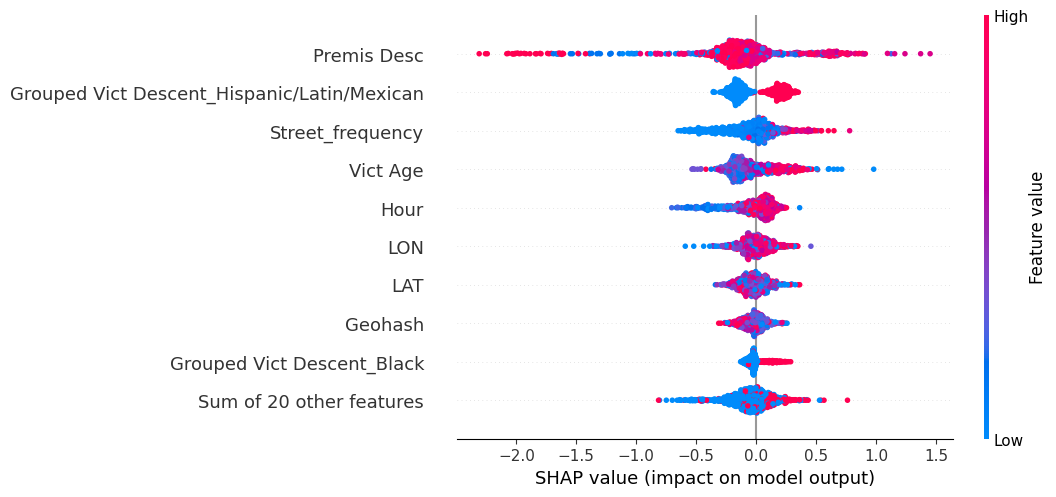

In [ ]:

# Create a SHAP explainer for the model
explainer = shap.TreeExplainer(xgb)

# Use a subset of the validation data for SHAP analysis to reduce computation
sample_size = 1000  # managable number of samples
X_test_sample = X_test_encoded[:sample_size]

# Compute SHAP values and generate an Explanation object
shap_values = explainer(X_test_sample)

# Select the SHAP values for a specific class 
class_index = 1  # Change to the index of the desired class
shap_values_single_class = shap_values[..., class_index]

# Create a SHAP beeswarm plot for the selected class and save as PNG
plt.figure(figsize=(9, 7))  
shap.plots.beeswarm(shap_values_single_class)
plt.savefig('shap_beeswarm_class_1.png', dpi=300, bbox_inches='tight')  
plt.close()  






In [ ]:
# Identify the class corresponding to indexes
shap_target_encoder = LabelEncoder()
shap_target_encoder.fit(y_test)  

# Print the mapping of class indices to actual class labels
for idx, label in enumerate(shap_target_encoder.classes_):
    print(f"Class {idx}: {label}")




Class 0: ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT
Class 1: BATTERY - SIMPLE ASSAULT
Class 2: BURGLARY FROM VEHICLE
Class 3: Burglary or Attempted Burglary
Class 4: Child-Related Offenses
Class 5: Intimate Partner - Assault
Class 6: Other Fraud
Class 7: Other General Assault
Class 8: Other Low-Frequency Crimes
Class 9: Other Vehicle-Related Crimes
Class 10: Personal Theft
Class 11: Public Disturbances
Class 12: ROBBERY
Class 13: Sexual Offenses
Class 14: Shoplifting
Class 15: THEFT OF IDENTITY
Class 16: Theft - Plain/Grand
Class 17: Theft from Vehicle
Class 18: VIOLATION OF RESTRAINING ORDER
Class 19: Vandalism - Felony/Misdemeanor
